<a href="https://colab.research.google.com/github/hadisbabakhani/music-dataset-project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hadis Babakhani Roudbardeh

#MSc Final Project

###Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
!pip install pingouin
import pingouin as pg
import scipy.stats as stats
from pandas.plotting import parallel_coordinates
from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import HTML
from sklearn.impute import SimpleImputer
from google.colab import files
import warnings
warnings.filterwarnings("ignore")




def pretty_print_df(value_counts_):
  "Quick function to display value counts more nicely"
  display(HTML(pd.DataFrame(value_counts_).to_html()))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7029 sha256=b7a197eb5c82db24bf1ae2fffde3f5f54067a9bf46c1ef6e2e4311c9daa50553
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [ ]:
uploaded = files.upload()
df_without_cleaning= pd.read_csv('Spotify_Youtube.csv')

Saving Spotify_Youtube.csv to Spotify_Youtube.csv


###Initial Exploratory Data Analysis

In [ ]:
df_without_cleaning.describe

<bound method NDFrame.describe of        Unnamed: 0       Artist  \
0               0     Gorillaz   
1               1     Gorillaz   
2               2     Gorillaz   
3               3     Gorillaz   
4               4     Gorillaz   
...           ...          ...   
20713       20713  SICK LEGEND   
20714       20714  SICK LEGEND   
20715       20715  SICK LEGEND   
20716       20716  SICK LEGEND   
20717       20717  SICK LEGEND   

                                             Url_spotify  \
0      https://open.spotify.com/artist/3AA28KZvwAUcZu...   
1      https://open.spotify.com/artist/3AA28KZvwAUcZu...   
2      https://open.spotify.com/artist/3AA28KZvwAUcZu...   
3      https://open.spotify.com/artist/3AA28KZvwAUcZu...   
4      https://open.spotify.com/artist/3AA28KZvwAUcZu...   
...                                                  ...   
20713  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
20714  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
20715  https://op

In [ ]:
display(df_without_cleaning)

Unnamed: 0       Artist  \
0               0     Gorillaz   
1               1     Gorillaz   
2               2     Gorillaz   
3               3     Gorillaz   
4               4     Gorillaz   
...           ...          ...   
20713       20713  SICK LEGEND   
20714       20714  SICK LEGEND   
20715       20715  SICK LEGEND   
20716       20716  SICK LEGEND   
20717       20717  SICK LEGEND   

                                             Url_spotify  \
0      https://open.spotify.com/artist/3AA28KZvwAUcZu...   
1      https://open.spotify.com/artist/3AA28KZvwAUcZu...   
2      https://open.spotify.com/artist/3AA28KZvwAUcZu...   
3      https://open.spotify.com/artist/3AA28KZvwAUcZu...   
4      https://open.spotify.com/artist/3AA28KZvwAUcZu...   
...                                                  ...   
20713  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
20714  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
20715  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
20716  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
20717  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   

                                               Track  \
0                                     Feel Good Inc.   
1                                    Rhinestone Eyes   
2      New Gold (feat. Tame Impala and Bootie Brown)   
3                                 On Melancholy Hill   
4                                     Clint Eastwood   
...                                              ...   
20713                           JUST DANCE HARDSTYLE   
20714                 SET FIRE TO THE RAIN HARDSTYLE   
20715                      OUTSIDE HARDSTYLE SPED UP   
20716                            ONLY GIRL HARDSTYLE   
20717                             MISS YOU HARDSTYLE   

                                               Album Album_type  \
0                                         Demon Days      album   
1                                      Plastic Beach      album   
2      New Gold (feat. Tame Impala and Bootie Brown)     single   
3                                      Plastic Beach      album   
4                                           Gorillaz      album   
...                                              ...        ...   
20713                           JUST DANCE HARDSTYLE     single   
20714                 SET FIRE TO THE RAIN HARDSTYLE     single   
20715                      OUTSIDE HARDSTYLE SPED UP     single   
20716                            ONLY GIRL HARDSTYLE     single   
20717                             MISS YOU HARDSTYLE     single   

                                        Uri  Danceability  Energy   Key  ...  \
0      spotify:track:0d28khcov6AiegSCpG5TuT         0.818   0.705   6.0  ...   
1      spotify:track:1foMv2HQwfQ2vntFf9HFeG         0.676   0.703   8.0  ...   
2      spotify:track:64dLd6rVqDLtkXFYrEUHIU         0.695   0.923   1.0  ...   
3      spotify:track:0q6LuUqGLUiCPP1cbdwFs3         0.689   0.739   2.0  ...   
4      spotify:track:7yMiX7n9SBvadzox8T5jzT         0.663   0.694  10.0  ...   
...                                     ...           ...     ...   ...  ...   
20713  spotify:track:0RtcKQGyI4hr8FgFH1TuYG         0.582   0.926   5.0  ...   
20714  spotify:track:3rHvPA8lUnPBkaLyPOc0VV         0.531   0.936   4.0  ...   
20715  spotify:track:4jk00YxPtPbhvHJE9N4ddv         0.443   0.830   4.0  ...   
20716  spotify:track:5EyErbpsugWliX006eTDex         0.417   0.767   9.0  ...   
20717  spotify:track:6lOn0jz1QpjcWeXo1oMm0k         0.498   0.938   6.0  ...   

                                       Url_youtube  \
0      https://www.youtube.com/watch?v=HyHNuVaZJ-k   
1      https://www.youtube.com/watch?v=yYDmaexVHic   
2      https://www.youtube.com/watch?v=qJa-VFwPpYA   
3      https://www.youtube.com/watch?v=04mfKJWDSzI   
4      https://www.youtube.com/watch?v=1V_xRb0x9aw   
...                                            ...   
20713  https://www.youtube.com/watch?v=5SHmKFKlNqI   
20714 

In [ ]:
df_without_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

In [ ]:
df_without_cleaning.isna().sum().sort_values(ascending=False)

Description         876
Stream              576
Comments            569
Likes               541
official_video      470
Licensed            470
Views               470
Channel             470
Title               470
Url_youtube         470
Valence               2
Duration_ms           2
Tempo                 2
Liveness              2
Instrumentalness      2
Acousticness          2
Speechiness           2
Loudness              2
Key                   2
Energy                2
Danceability          2
Artist                0
Uri                   0
Album_type            0
Album                 0
Track                 0
Url_spotify           0
Unnamed: 0            0
dtype: int64

In [ ]:
#  checked to see any duplicate rows

print(f'Is there any duplicate rows? {df_without_cleaning.duplicated().any()}')
print(f'There are {len(df_without_cleaning)-len(df_without_cleaning.drop_duplicates()):,} duplicate rows')

Is there any duplicate rows? False
There are 0 duplicate rows


In [ ]:
# data types
print(df_without_cleaning.dtypes.value_counts())

float64    15
object     12
int64       1
dtype: int64


In [ ]:
df_without_cleaning.columns

Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

###Data Preprocessing

some features removed since they weren't useful for the project questions

In [ ]:
df_without_cleaning.drop(columns=['Unnamed: 0', 'Url_spotify', 'Url_youtube', 'Uri', 'Description'], inplace=True)


In [ ]:
def pretty_print(df_without_cleaning):
    categorical_columns = [col for col in df_without_cleaning.columns if df_without_cleaning[col].dtype == 'object']
    sample_data = df_without_cleaning[categorical_columns].sample(5)
    return sample_data

print(pretty_print(df_without_cleaning))


                  Artist                         Track  \
11572  11:11 Music Group  after dark x sweater weather   
20180            Tiakola                          M3lo   
3161         Babasónicos                   Carismático   
6725             Kenny G                    The Moment   
14223       Luan Santana                        MORENA   

                                                  Album Album_type  \
11572  after dark x sweater weather (slowed and reverb)     single   
20180                                              Mélo      album   
3161                                             Anoche      album   
6725                                         The Moment      album   
14223                                            MORENA     single   

                                       Title            Channel Licensed  \
11572           After Dark x Sweater Weather  11:11 Music Group    False   
20180         Tiakola - M3lo (Clip Officiel)            Tiakola    False   
31

In [ ]:
def pretty_print(df_without_cleaning):
    # Set the display options for pandas
    pd.set_option('display.max_columns', None)
    pd.set_option('display.expand_frame_repr', False)
    pd.set_option('max_colwidth', -1)

    # Print the DataFrame
    print(df_without_cleaning)

numerical_columns = [col for col in df_without_cleaning.columns if pd.api.types.is_numeric_dtype(df_without_cleaning[col])]

# Print numerical columns
for col in numerical_columns:
    print(f"Summary statistics for '{col}'")
    pretty_print(df_without_cleaning[col].describe())
    print()


Summary statistics for 'Danceability'
count    20716.000000
mean     0.619777    
std      0.165272    
min      0.000000    
25%      0.518000    
50%      0.637000    
75%      0.740250    
max      0.975000    
Name: Danceability, dtype: float64

Summary statistics for 'Energy'
count    20716.000000
mean     0.635250    
std      0.214147    
min      0.000020    
25%      0.507000    
50%      0.666000    
75%      0.798000    
max      1.000000    
Name: Energy, dtype: float64

Summary statistics for 'Key'
count    20716.000000
mean     5.300348    
std      3.576449    
min      0.000000    
25%      2.000000    
50%      5.000000    
75%      8.000000    
max      11.000000   
Name: Key, dtype: float64

Summary statistics for 'Loudness'
count    20716.000000
mean    -7.671680    
std      4.632749    
min     -46.251000   
25%     -8.858000    
50%     -6.536000    
75%     -4.931000    
max      0.920000    
Name: Loudness, dtype: float64

Summary statistics for 'Speechiness'
c

In [ ]:
df_without_cleaning.isnull().sum()#check to see how many missing values do we have

Artist              0  
Track               0  
Album               0  
Album_type          0  
Danceability        2  
Energy              2  
Key                 2  
Loudness            2  
Speechiness         2  
Acousticness        2  
Instrumentalness    2  
Liveness            2  
Valence             2  
Tempo               2  
Duration_ms         2  
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Licensed            470
official_video      470
Stream              576
dtype: int64

In [ ]:
columns_to_clean = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms']
df_cleaned = df_without_cleaning.dropna(subset=columns_to_clean, how='any')

In [ ]:
df_cleaned = df_without_cleaning.dropna()

In [ ]:
df_cleaned.isnull().sum()

Artist              0
Track               0
Album               0
Album_type          0
Danceability        0
Energy              0
Key                 0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
Title               0
Channel             0
Views               0
Likes               0
Comments            0
Licensed            0
official_video      0
Stream              0
dtype: int64

In [ ]:
df_cleaned.shape

(19549, 23)

In [ ]:
df_cleaned = df_cleaned.copy()#create a popularity column from views,likes, comments and stream
df_cleaned['popularity'] = df_cleaned['Views'] + df_cleaned['Stream'] + df_cleaned['Likes'] + df_cleaned['Comments']



In [ ]:
df_cleaned = df_cleaned.rename(columns={"Album_type": "Type"})


In [ ]:
df_cleaned['Duration_min'] = df_cleaned['Duration_ms'] / 60000
df_cleaned = df_cleaned.drop(columns=['Duration_ms'])



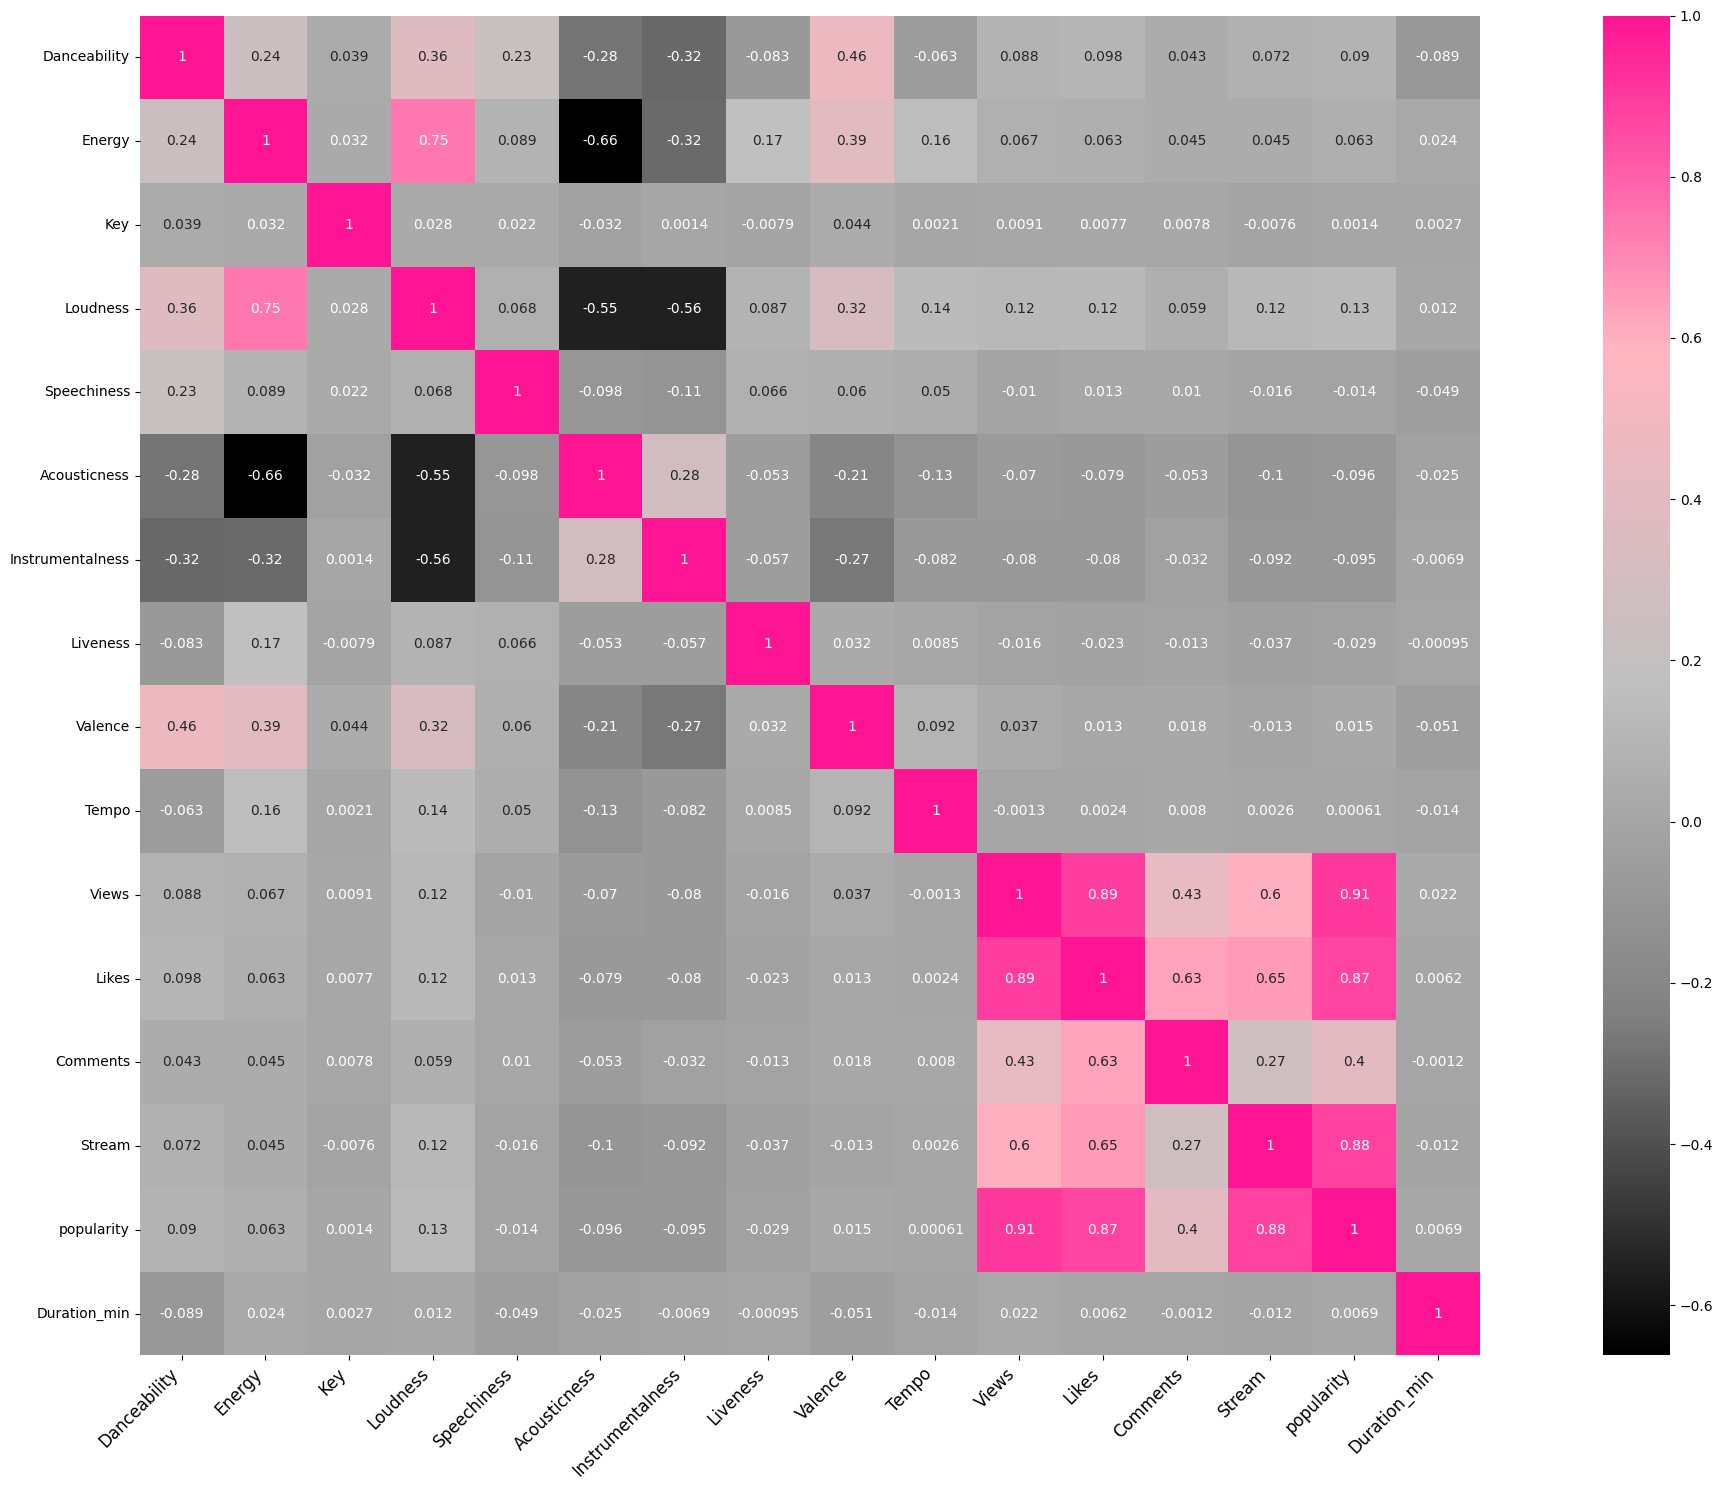

In [ ]:
# Create the colormap
colors = ["black", "gray", "silver", "lightpink", "deeppink"]
cmap = LinearSegmentedColormap.from_list("myColormap", colors)

# Calculate the correlation matrix
corr = df_cleaned.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 15))  # Adjust the size as per requirement

# Draw the heatmap with the custom colormap, and add annotations
sns.heatmap(corr, cmap=cmap, annot=True, square=True)

# Rotate x-labels for better visibility
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
correlations = df_cleaned[[ 'popularity','Views', 'Likes', 'Stream', 'Comments']].corr()

# Display the correlation coefficients
print(correlations['popularity'])


popularity    1.000000
Views         0.908384
Likes         0.872657
Stream        0.881058
Comments      0.397336
Name: popularity, dtype: float64


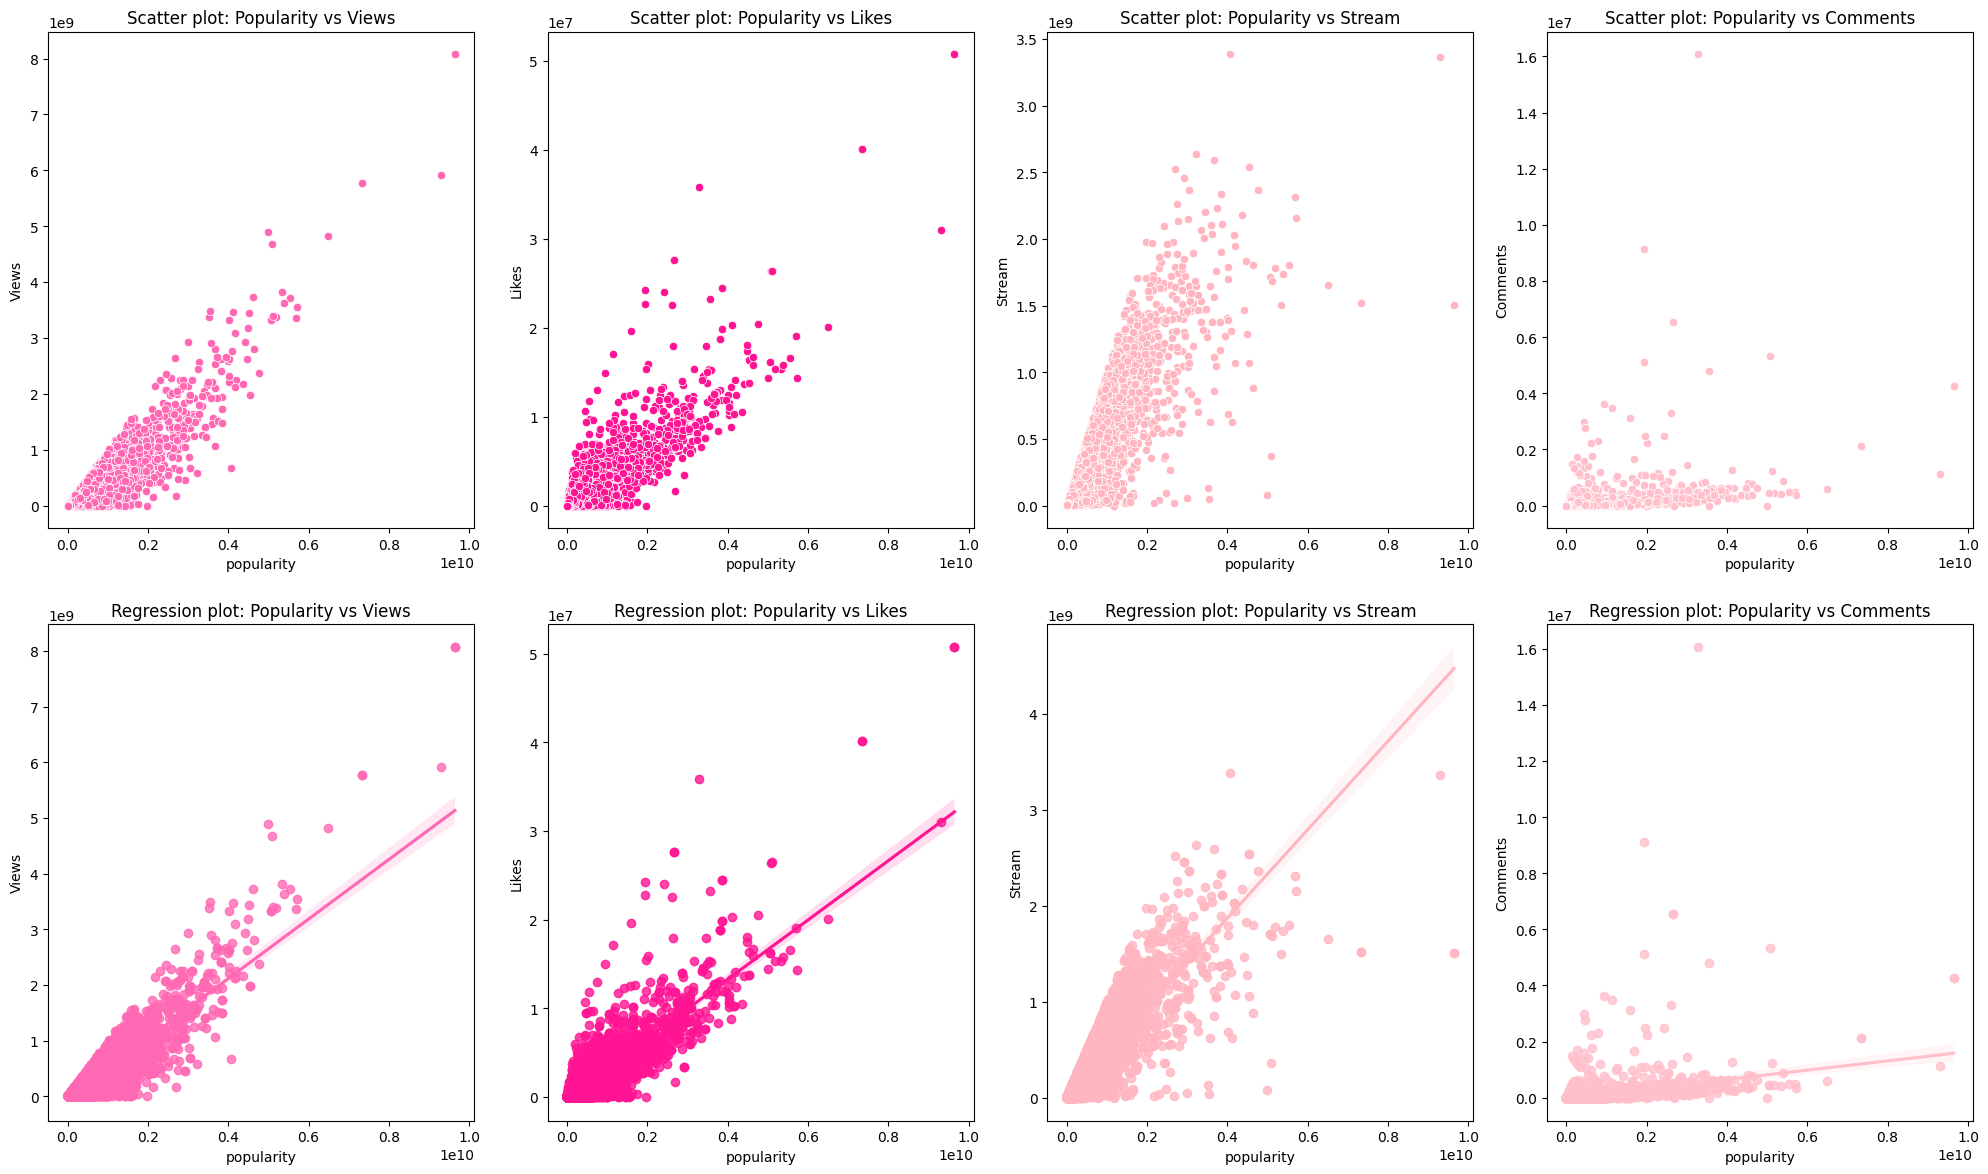

In [ ]:
metrics = ['Views', 'Likes', 'Stream', 'Comments']
colors = ['hotpink', 'deeppink', 'lightpink', 'pink']

# Setting up the figure and axes array
fig, axes = plt.subplots(2, 4, figsize=(20, 12))

for i, (metric, color) in enumerate(zip(metrics, colors)):
    # Scatter plot
    sns.scatterplot(data=df_cleaned, x='popularity', y=metric, ax=axes[0, i], color=color)
    axes[0, i].set_title(f'Scatter plot: Popularity vs {metric}')

    # Regression plot
    sns.regplot(data=df_cleaned, x='popularity', y=metric, ax=axes[1, i], color=color)
    axes[1, i].set_title(f'Regression plot: Popularity vs {metric}')

# Improve layout spacing
plt.tight_layout()



# Display the combined plot
plt.show()



In [ ]:
# feature selection for clustering
features = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']
X = df_cleaned[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



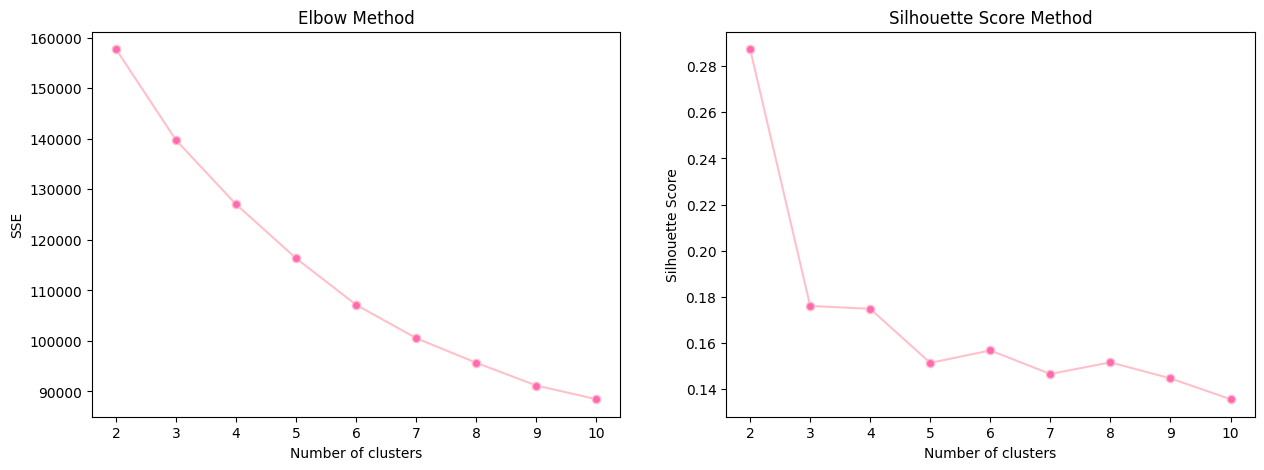

In [ ]:
# Store the SSE (Sum of Squared Errors) and silhouette scores
sse = []
silhouette_scores = []

# Iterate from 2 to 10 to find the optimal number of clusters
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot the elbow method and silhouette score to find the optimal number of clusters
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.plot(range(2, 11), sse, marker='o', color='pink', markerfacecolor='hotpink')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('SSE')
ax1.set_title('Elbow Method')

ax2.plot(range(2, 11), silhouette_scores, marker='o', color='pink', markerfacecolor='hotpink')
ax2.set_xlabel('Number of clusters')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score Method')

plt.show()


In [ ]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Added the cluster labels to the dataframe
df_cleaned['mood'] = kmeans.labels_


In [ ]:
# Calculation of mean values for each feature per cluster
cluster_means = df_cleaned.groupby('mood')[features].mean()


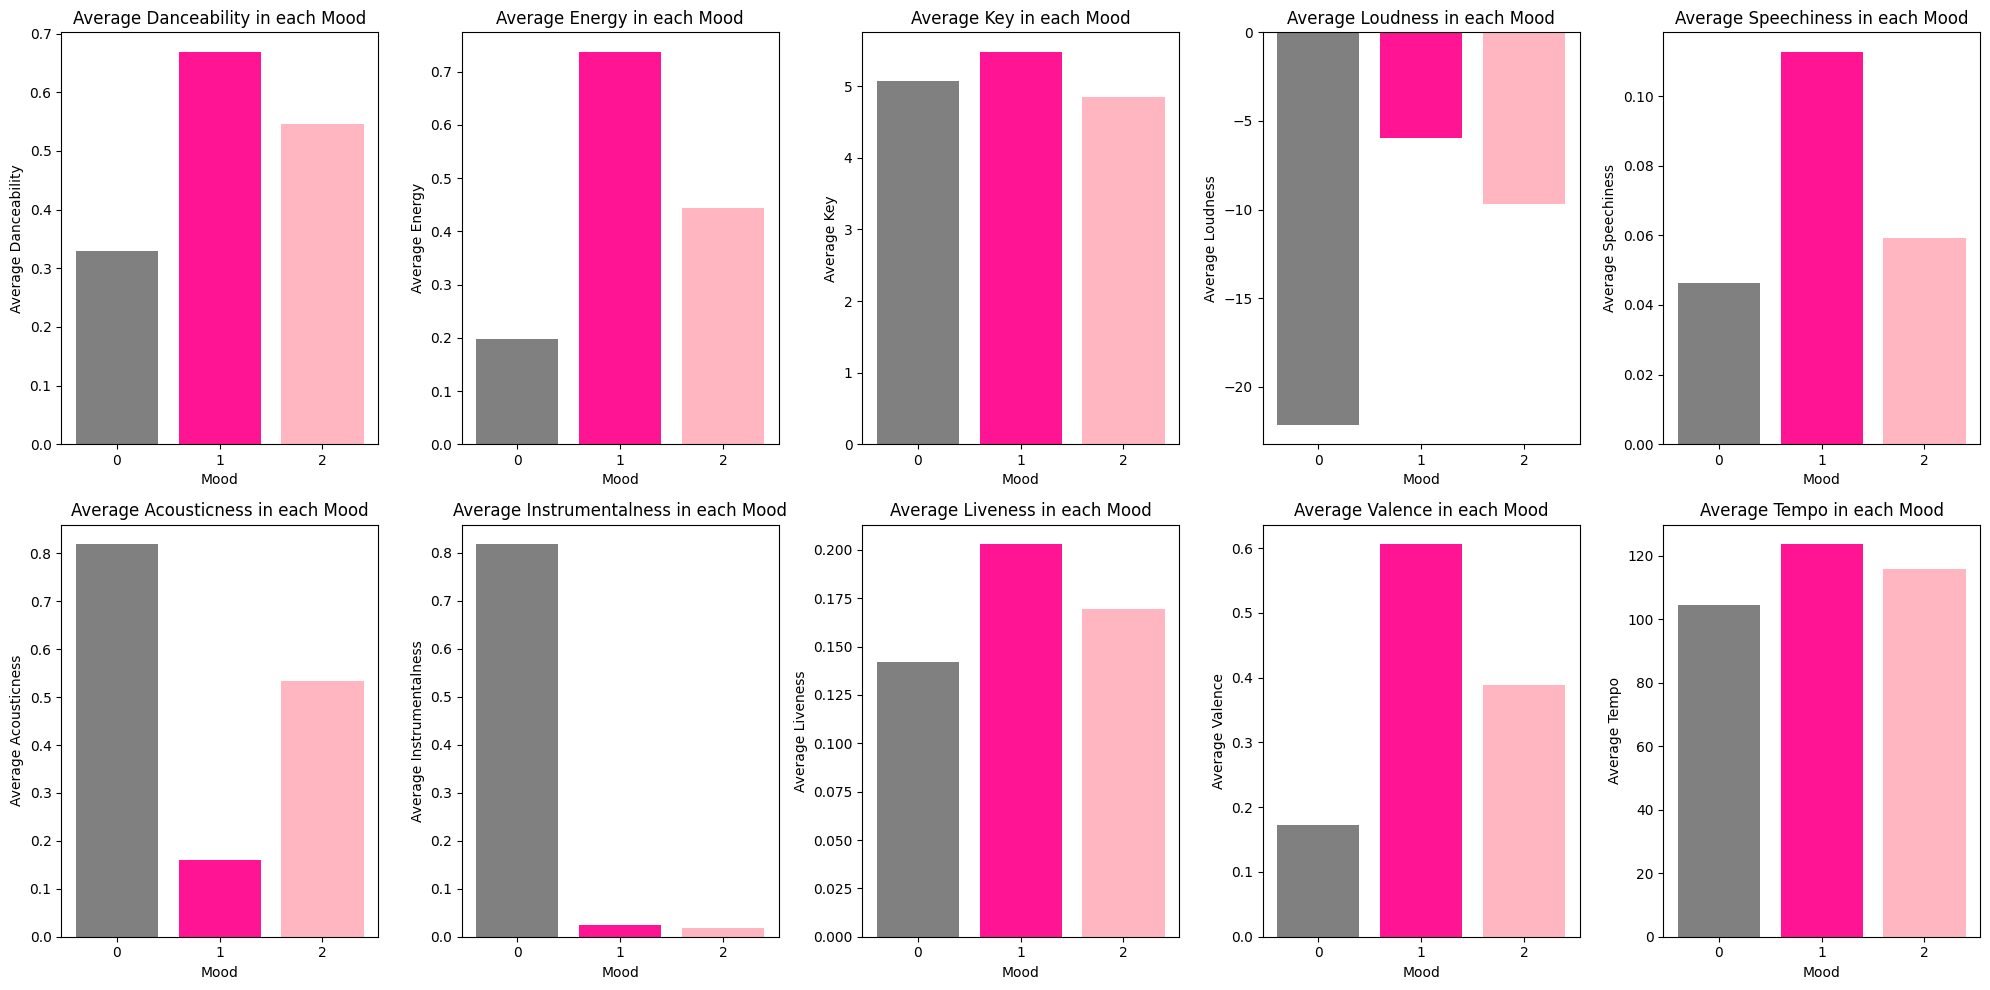

In [ ]:
colors = {0: 'grey', 1: 'deeppink', 2: 'lightpink'}
n_features = len(features)
n_cols = 5  # Set the number of columns
n_rows = (n_features + n_cols - 1) // n_cols  # Calculate the number of rows

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 10))

# Flatten the axes to make it easier to iterate
axes_flat = axes.flatten()

# For each feature, create a subplot
for i, feature in enumerate(features):
    ax = axes_flat[i]

    # For each mood, create a bar in the subplot with the appropriate color
    for mood in cluster_means.index:
        ax.bar(str(mood), cluster_means.loc[mood, feature], color=colors[mood])

    ax.set_title(f'Average {feature} in each Mood')
    ax.set_xlabel('Mood')
    ax.set_ylabel(f'Average {feature}')

# Remove extra subplots (if any)
for i in range(len(features), len(axes_flat)):
    fig.delaxes(axes_flat[i])

plt.tight_layout()
plt.savefig('Moods.png')  # Saves the whole figure
plt.show()



In [ ]:
mood_labels = {0: 'Relaxed', 1: 'Energetic', 2: 'Neutral'}

# Applied the mapping to create a new column with mood labels
df_cleaned['mood_label'] = df_cleaned['mood'].map(mood_labels)


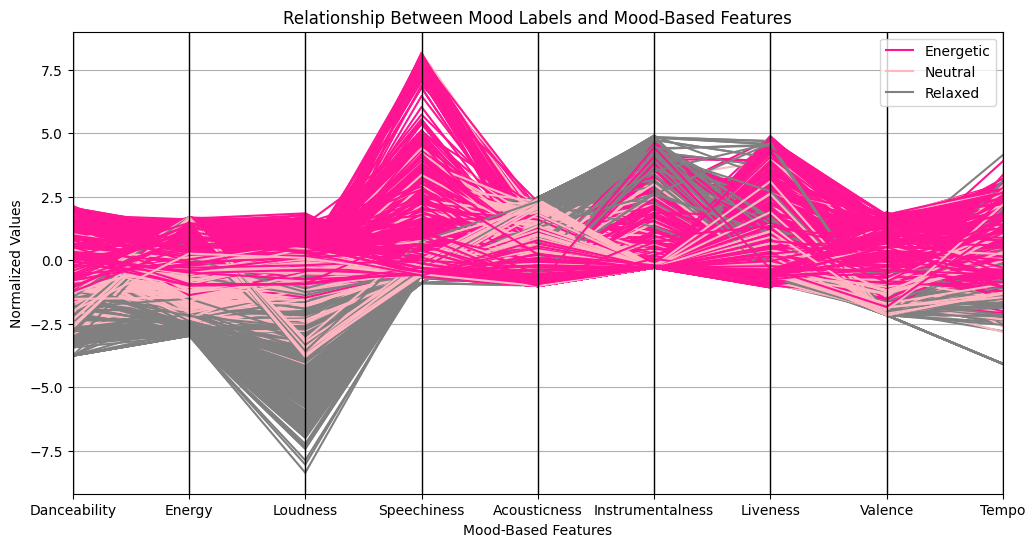

In [ ]:
# Select mood labels and mood-based features
mood_features = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness',
                 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']

# Subset the data for mood labels and mood-based features
mood_data = df_cleaned[['mood_label'] + mood_features]

# Normalize the data
mood_data_norm = (mood_data[mood_features] - mood_data[mood_features].mean()) / mood_data[mood_features].std()

# Add the normalized features back to the mood label column
mood_data_norm['mood_label'] = mood_data['mood_label']

# Create a color dictionary
colors = {'Relaxed': 'grey', 'Neutral': 'lightpink', 'Energetic': 'deeppink'}

# Create the parallel coordinates plot
plt.figure(figsize=(12, 6))
parallel_coordinates(mood_data_norm, 'mood_label', color=[colors[i] for i in mood_data_norm['mood_label'].unique()])

# Set plot title and labels
plt.title('Relationship Between Mood Labels and Mood-Based Features')
plt.xlabel('Mood-Based Features')
plt.ylabel('Normalized Values')

# Show the plot
plt.show()

In [ ]:
# Grouped the DataFrame by 'Track', calculated the 'Danceability' for each track
danceability_tracks = df_cleaned.groupby('Track')['Danceability'].mean()

# Found the mood for each track
mood_tracks = df_cleaned.groupby('Track')['mood_label'].agg(lambda x: x.value_counts().index[0])

# Joined the danceability and mood dataframes
top_danceable_tracks = pd.concat([danceability_tracks, mood_tracks], axis=1)

# Sorted the tracks by danceability and take the top 10
top_danceable_tracks = top_danceable_tracks.sort_values('Danceability', ascending=False).head(10)

# Print the top 10 tracks with their danceability and mood
print(top_danceable_tracks)


                                                 Danceability mood_label
Track                                                                   
Give It To Me                                    0.975         Energetic
Funky Friday                                     0.975         Energetic
CAN'T TOUCH THIS                                 0.975         Energetic
Psycho Pass                                      0.973         Energetic
RIP Young (feat. Project Pat & Juicy J) - Remix  0.971         Energetic
Like I Ain't                                     0.970         Energetic
Baby (Lil Baby feat. DaBaby)                     0.970         Energetic
If You're Happy                                  0.968         Energetic
Aka Entre el Humo                                0.967         Energetic
SexyBack (feat. Timbaland)                       0.967         Energetic


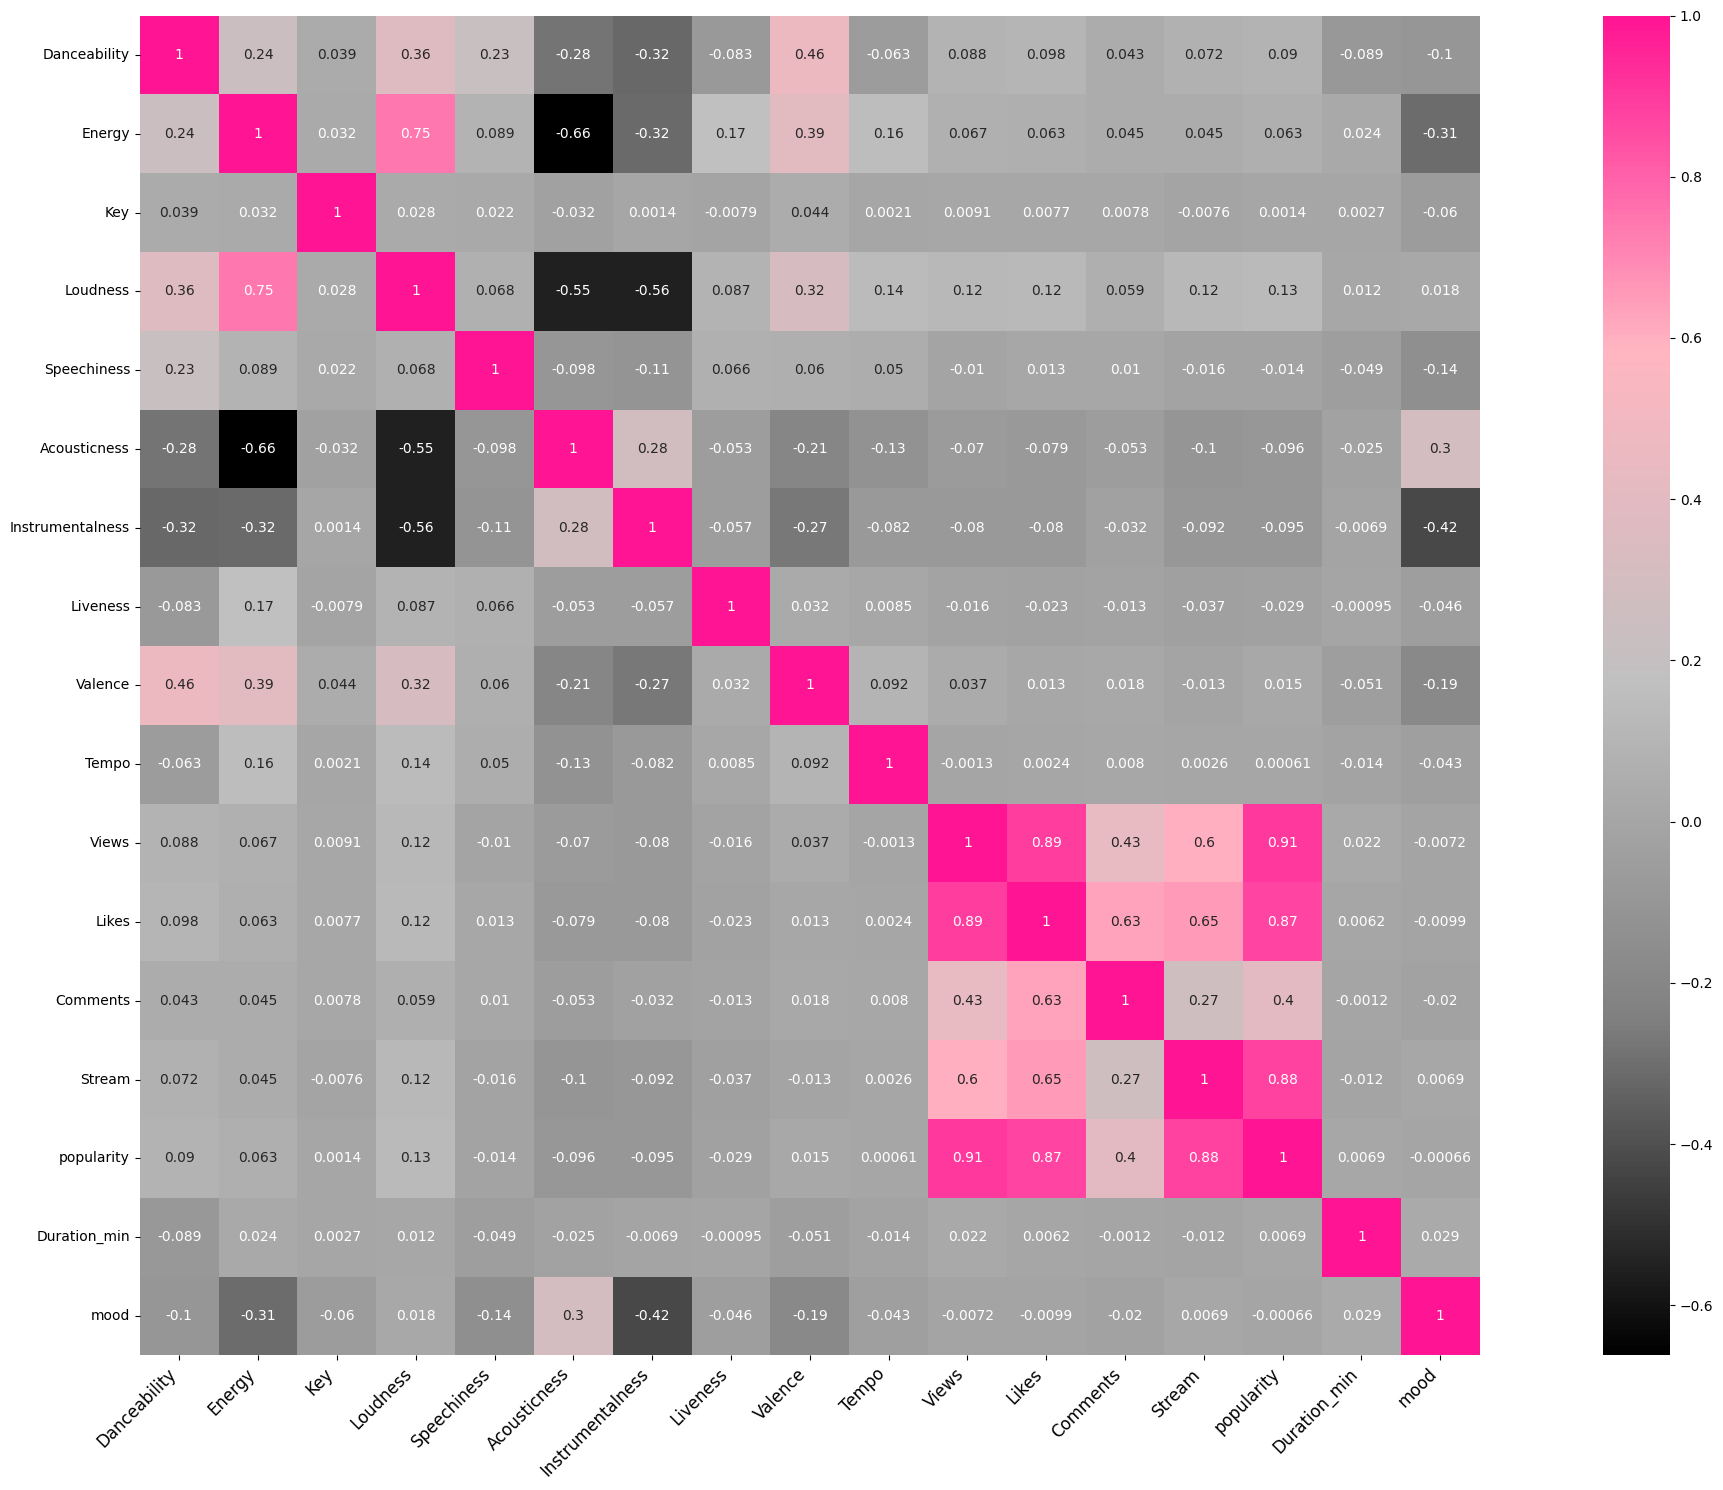

In [ ]:
# Create the colormap
colors = ["black", "gray", "silver", "lightpink", "deeppink"]
cmap = LinearSegmentedColormap.from_list("myColormap", colors)

# Calculate the correlation matrix
corr = df_cleaned.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 15))

# Draw the heatmap with the custom colormap, and add annotations
sns.heatmap(corr, cmap=cmap, annot=True, square=True)

# Rotate x-labels for better visibility
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
df_cleaned.columns

Index(['Artist', 'Track', 'Album', 'Type', 'Danceability', 'Energy', 'Key',
       'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Licensed', 'official_video', 'Stream', 'popularity',
       'Duration_min', 'mood', 'mood_label'],
      dtype='object')

###Post-Preprocessing Exploratory Data Analysis

<Axes: xlabel='mood_label', ylabel='popularity'>

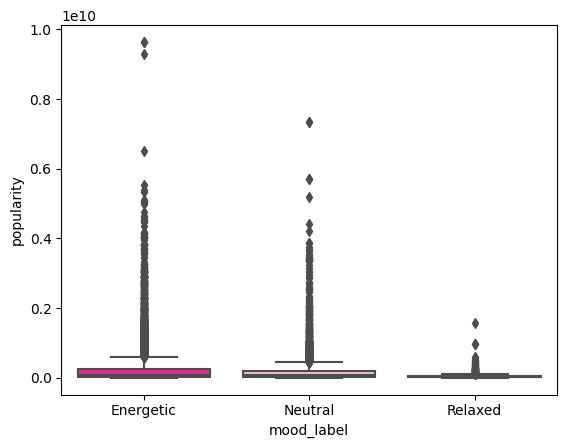

In [ ]:
sns.boxplot(x="mood_label", y="popularity", data=df_cleaned, palette=["deeppink", "lightpink", "grey"])


<Axes: xlabel='mood_label', ylabel='popularity'>

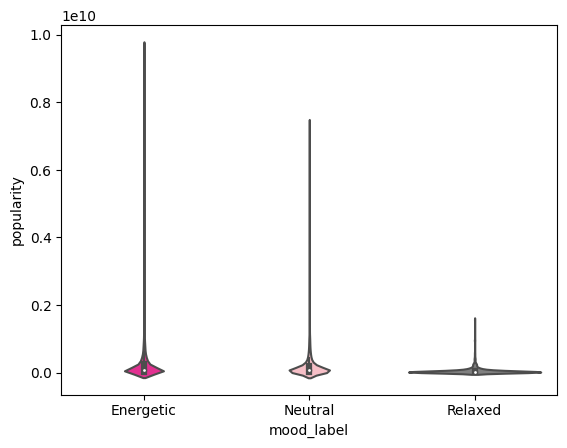

In [ ]:
sns.violinplot(x="mood_label", y="popularity", data=df_cleaned ,palette=["deeppink", "lightpink", "grey"])


<Axes: xlabel='mood_label', ylabel='popularity'>

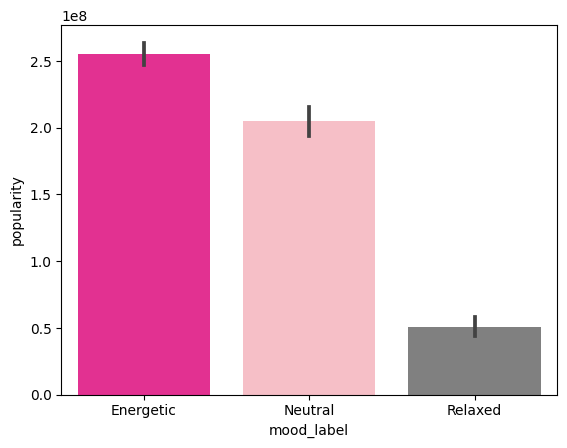

In [ ]:
sns.barplot(x="mood_label", y="popularity", data=df_cleaned, palette=["deeppink", "lightpink", "grey"])


In [ ]:
df_cleaned['mood_label'].value_counts()

Energetic    13435
Neutral      5302 
Relaxed      812  
Name: mood_label, dtype: int64

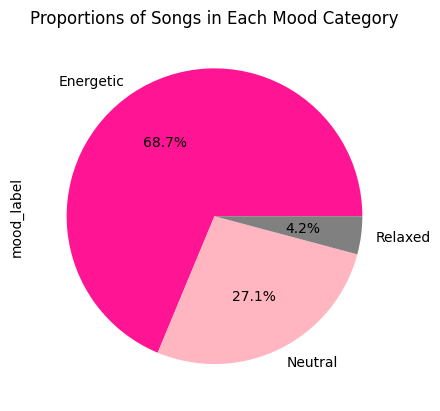

In [ ]:
palette=["deeppink", "lightpink", "grey"]
df_cleaned['mood_label'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=palette)
plt.title('Proportions of Songs in Each Mood Category')
plt.show()


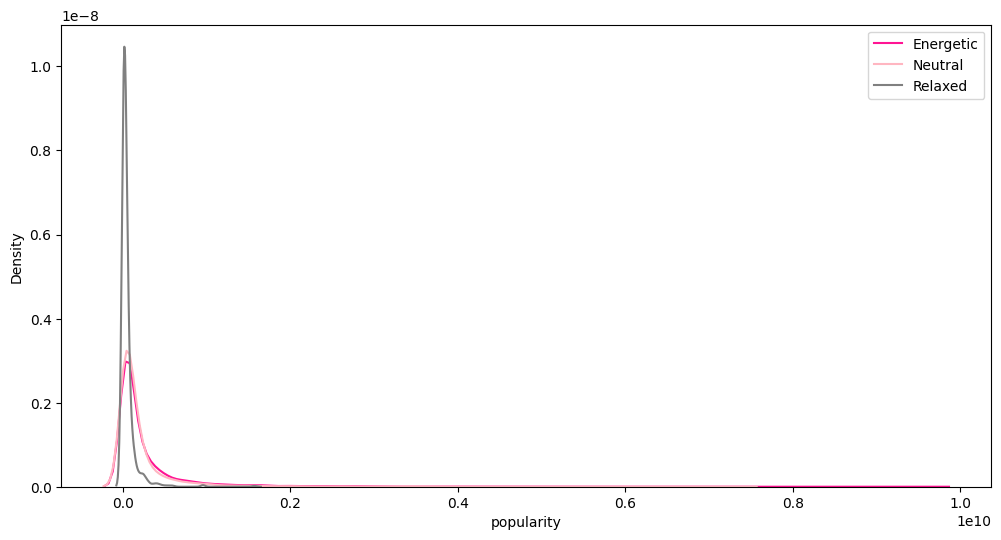

In [ ]:
colors = {'Relaxed': 'grey', 'Energetic': 'deeppink', 'Neutral': 'lightpink'}

plt.figure(figsize=(12, 6))
for label in df_cleaned['mood_label'].unique():
    sns.kdeplot(df_cleaned[df_cleaned['mood_label'] == label]['popularity'], label=label, color=colors[label])

plt.legend()
plt.show()


The Kernel Density Estimation (KDE) plot shows the distribution of the popularity metric for each mood label. KDE is a technique that lets us create a smooth curve given a set of data. This can be useful if we want to visualize just the “shape” of some data, as a kind of continuous replacement for the discrete histogram.

From the plot, it seems that 'Energetic' songs have higher popularity ratings compared to 'Neutral' and 'Relaxed' songs. This could indicate that more energetic songs tend to be more popular among listeners. It's also notable that the density of popularity for 'Relaxed' songs peaks at a much higher value compared to 'Energetic' and 'Neutral', despite the actual popularity being much lower. This may suggest that 'Relaxed' songs have a more consistent level of popularity, whereas 'Energetic' and 'Neutral' songs might have a wider range of popularity ratings.

In [ ]:
# Separate different moods
df_energetic = df_cleaned[df_cleaned.mood_label=='Energetic']
df_relaxed = df_cleaned[df_cleaned.mood_label=='Relaxed']
df_neutral = df_cleaned[df_cleaned.mood_label=='Neutral']

# Find the number of samples in the smallest group
n_samples = min(len(df_energetic), len(df_relaxed), len(df_neutral))

# Downsample all groups to match the smallest group
df_energetic_downsampled = resample(df_energetic, replace=False, n_samples=n_samples, random_state=123)
df_relaxed_downsampled = resample(df_relaxed, replace=False, n_samples=n_samples, random_state=123)
df_neutral_downsampled = resample(df_neutral, replace=False, n_samples=n_samples, random_state=123)

# Combine all downsampled groups back into a single dataframe
df_balanced = pd.concat([df_energetic_downsampled, df_relaxed_downsampled, df_neutral_downsampled])

# Display new class counts
print(df_balanced.mood_label.value_counts())


Energetic    812
Relaxed      812
Neutral      812
Name: mood_label, dtype: int64


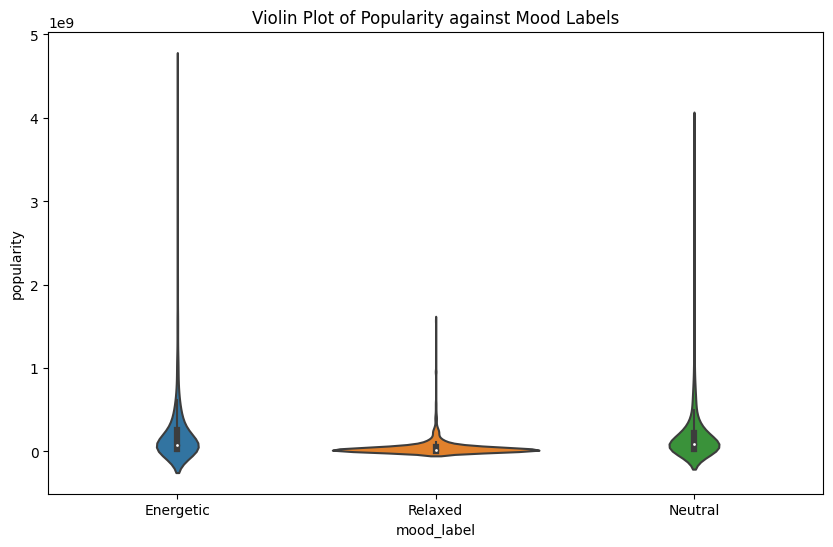

In [ ]:
# Violin plot of popularity against mood labels
plt.figure(figsize=(10, 6))
sns.violinplot(x='mood_label', y='popularity', data=df_balanced)
plt.title('Violin Plot of Popularity against Mood Labels')
plt.show()


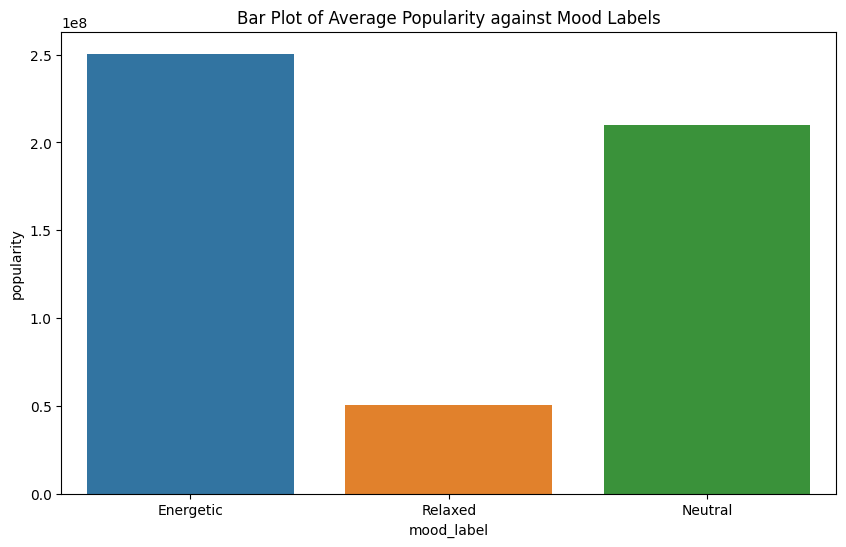

In [ ]:
# Bar plot of average popularity against mood labels
plt.figure(figsize=(10, 6))
sns.barplot(x='mood_label', y='popularity', data=df_balanced, ci=None)
plt.title('Bar Plot of Average Popularity against Mood Labels')
plt.show()

In [ ]:
# Separate features and target variable
X = df_cleaned.drop('mood_label', axis=1)  # Assuming all other columns are features
y = df_cleaned['mood_label']

ros = RandomOverSampler(random_state=123)
X_ros, y_ros = ros.fit_resample(X, y)

# Combining the features and target variable into a single dataframe after oversampling
df_balanced_ros = pd.concat([pd.DataFrame(X_ros), pd.DataFrame(y_ros)], axis=1)

# Display new class counts
print(df_balanced_ros.mood_label.value_counts())


Energetic    13435
Neutral      13435
Relaxed      13435
Name: mood_label, dtype: int64


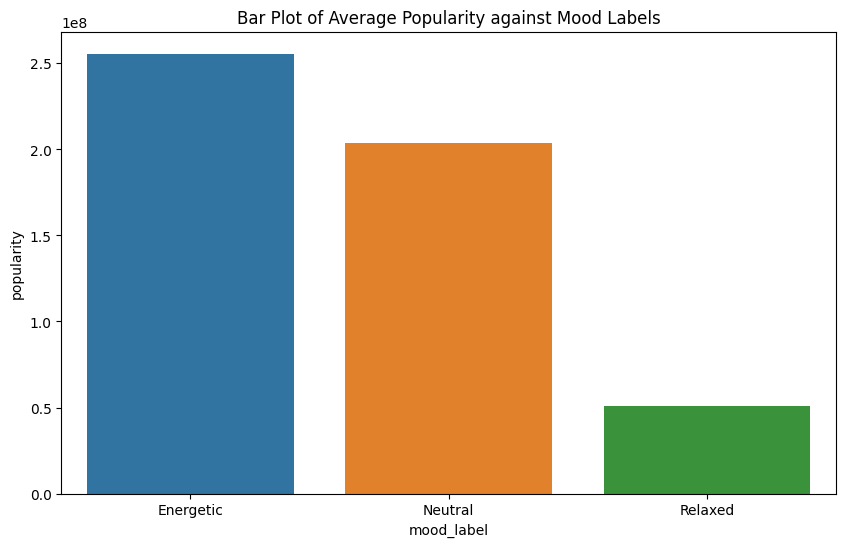

In [ ]:
# Bar plot of average popularity against mood labels
plt.figure(figsize=(10, 6))
sns.barplot(x='mood_label', y='popularity', data=df_balanced_ros, ci=None)
plt.title('Bar Plot of Average Popularity against Mood Labels')
plt.show()

In [ ]:
aov = pg.welch_anova(dv='popularity', between='mood_label', data=df_cleaned)
print(aov)



       Source  ddof1        ddof2           F          p-unc       np2
0  mood_label  2      5612.686595  750.038491  2.080912e-289  0.008796


In [ ]:
# Perform Games-Howell posthoc test
result = pg.pairwise_gameshowell(data=df_cleaned, dv='popularity', between='mood_label')

# Print result
print(result)



           A        B       mean(A)       mean(B)          diff            se          T            df          pval    hedges
0  Energetic  Neutral  2.555789e+08  2.047009e+08  5.087806e+07  7.275393e+06  6.993169   11189.126412  9.808154e-12  0.106348
1  Energetic  Relaxed  2.555789e+08  5.056323e+07  2.050157e+08  5.528495e+06  37.083454  4484.137491   3.051004e-12  0.424357
2  Neutral    Relaxed  2.047009e+08  5.056323e+07  1.541376e+08  6.837032e+06  22.544525  5349.625269   2.253198e-12  0.385034


In [ ]:
#one-way ANOVA (Analysis of Variance) test
labels = ['Relaxed', 'Neutral', 'Energetic']

groups = [df_cleaned[df_cleaned['mood_label'] == label]['popularity'] for label in labels]

f_stat, p_val = stats.f_oneway(*groups)

print(f'F-statistic: {f_stat}, P-value: {p_val}')



F-statistic: 86.72454250348449, P-value: 3.1779037008949947e-38


In [ ]:
# Group the dataframe by 'mood_label' and calculate the mean popularity
mean_popularity = df_cleaned.groupby('mood_label')['popularity'].mean()

print(mean_popularity)


mood_label
Energetic    2.555789e+08
Neutral      2.047009e+08
Relaxed      5.056323e+07
Name: popularity, dtype: float64


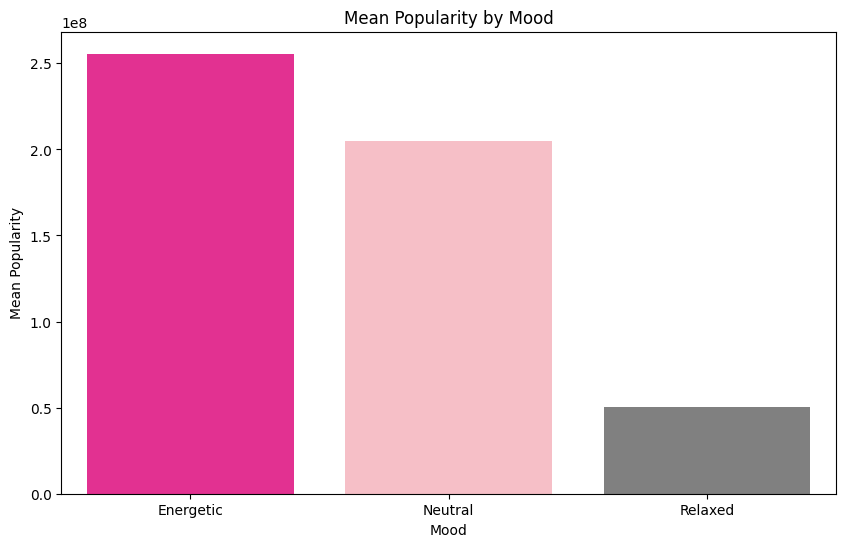

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_popularity.index, y=mean_popularity.values,palette=["deeppink", "lightpink", "grey"])
plt.title('Mean Popularity by Mood')
plt.xlabel('Mood')
plt.ylabel('Mean Popularity')
plt.show()


In [ ]:
# Group the dataframe by 'mood_label' and calculate the mean popularity
median_popularity = df_cleaned.groupby('mood_label')['popularity'].median()

print(median_popularity)

mood_label
Energetic    87946118.0
Neutral      76546181.5
Relaxed      21817028.0
Name: popularity, dtype: float64


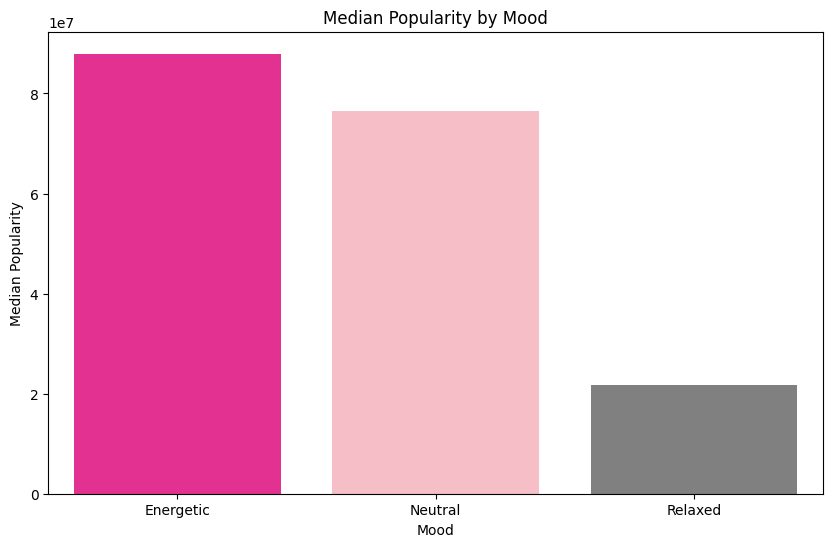

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=median_popularity.index, y=median_popularity.values ,palette=["deeppink", "lightpink", "grey"])
plt.title('Median Popularity by Mood')
plt.xlabel('Mood')
plt.ylabel('Median Popularity')
plt.show()


Following our Welch ANOVA and post-hoc tests, we further explored the distribution of song popularity within each mood category by computing the mean and median popularity scores.

The mean values provide a measure of the 'average' popularity within each group. From these, we observed that songs labeled 'Energetic' have the highest average popularity (approximately 255,578,900), followed by 'Neutral' (approximately 204,700,900) and finally 'Relaxed' (approximately 50,563,230). This complements our earlier statistical findings and suggests a pattern of higher popularity for 'Energetic' songs on average.

However, the mean is susceptible to outliers which can skew the values. To account for this, we also calculated the median popularity scores. The medians, less affected by outliers, again showed the highest values for 'Energetic' songs (approximately 87,946,118), followed by 'Neutral' (approximately 76,546,181.5), and 'Relaxed' (approximately 21,817,028).

These additional descriptive statistics enrich our understanding of the relationship between song mood and popularity. They reaffirm our earlier findings from the Welch ANOVA and Games-Howell post-hoc test, further supporting the observation that songs classified as 'Energetic' tend to be more popular, followed by 'Neutral' and then 'Relaxed' songs."



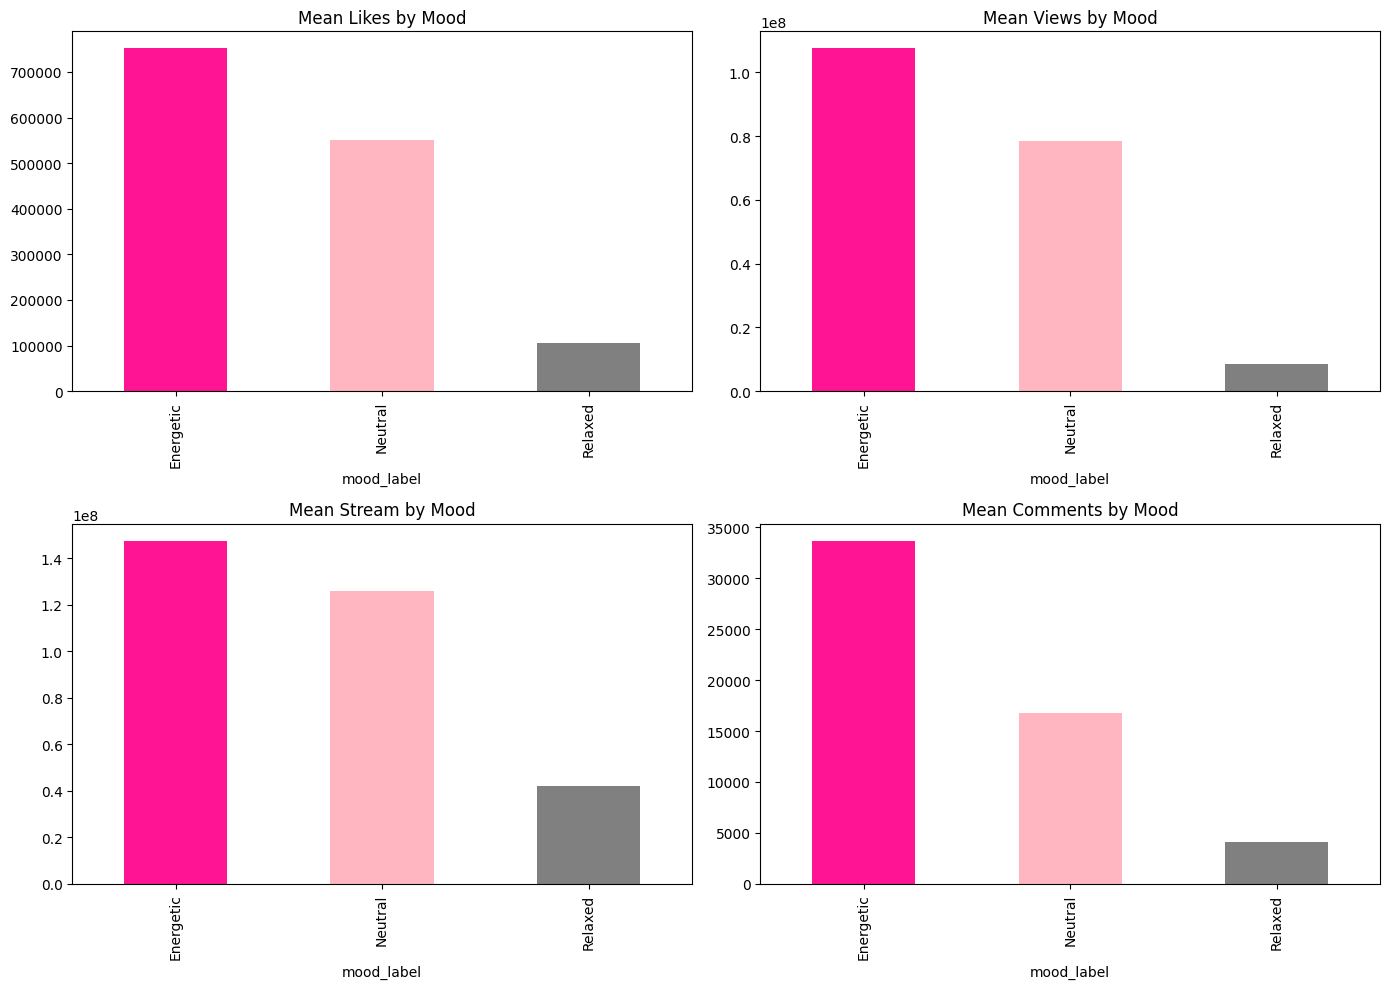

In [ ]:
# List of metrics
metrics = ['Likes', 'Views', 'Stream', 'Comments']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    # Calculate the mean for each mood
    mean_values = df_cleaned.groupby('mood_label')[metric].mean()

    # Define the colors
    colors = ["deeppink", "lightpink", "grey"]

    # Bar plot
    mean_values.plot(kind='bar', ax=ax, color=colors)

    # Set title
    ax.set_title(f'Mean {metric} by Mood')

# Avoid overlapping
plt.tight_layout()
plt.show()


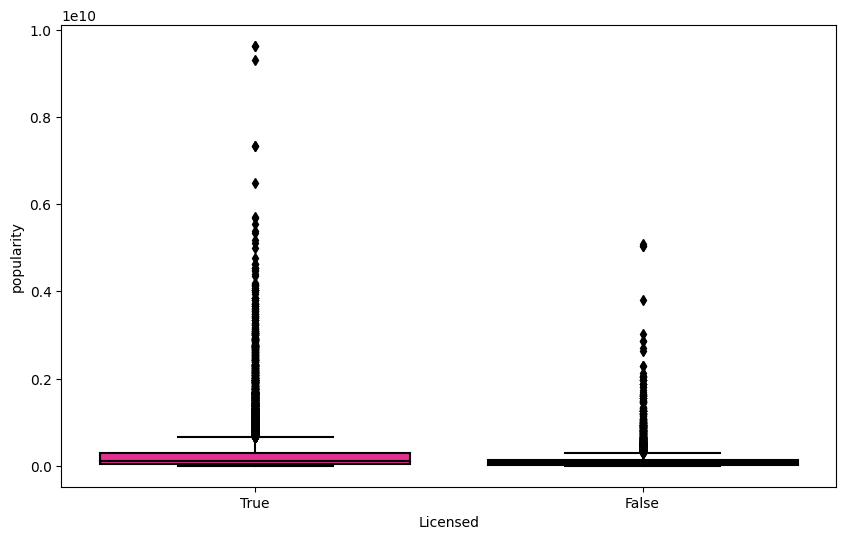

In [ ]:
# Define the color palette
palette = {"True": "deeppink", "False": "black"}

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Licensed', y='popularity', data=df_cleaned.astype({'Licensed': str}), palette=palette)

# Show the plot
plt.show()


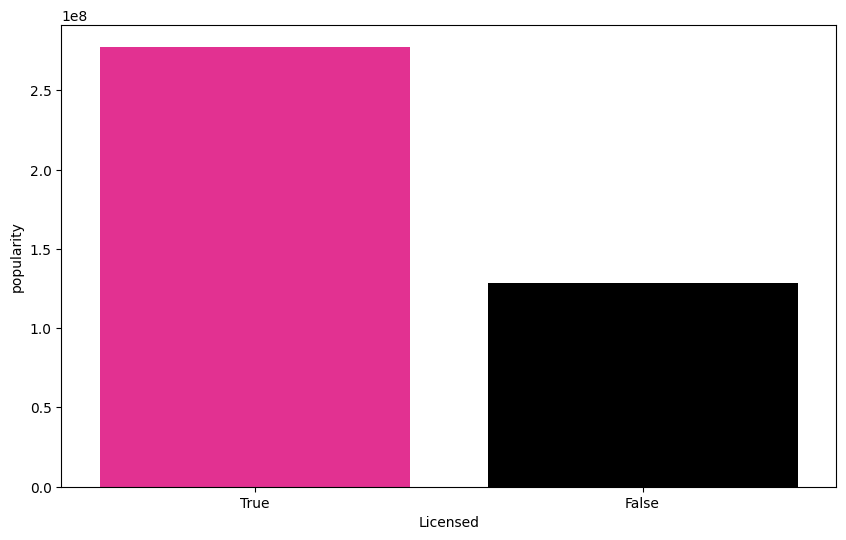

In [ ]:
# Define the color palette
palette = {"True": "deeppink", "False": "black"}

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Licensed', y='popularity', data=df_cleaned.astype({'Licensed': str}), ci=None, palette=palette)

# Show the plot
plt.show()


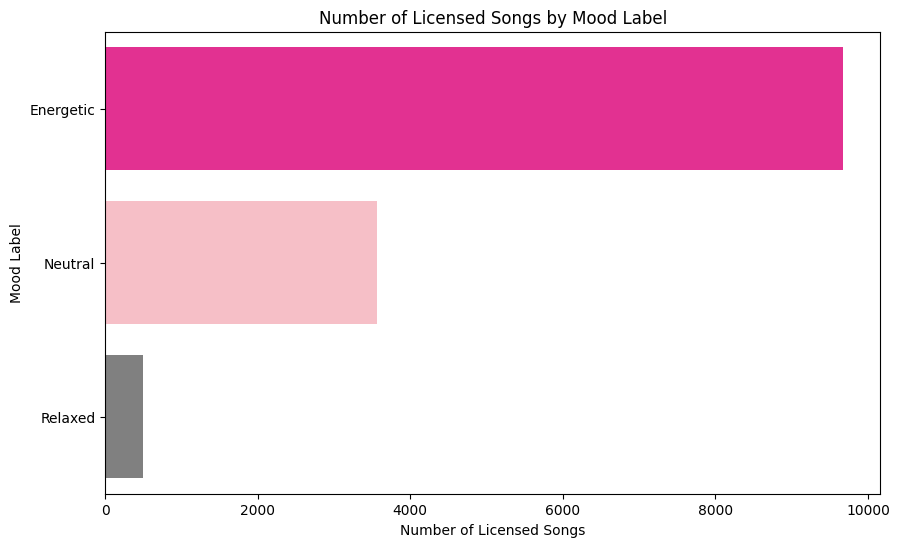

In [ ]:
licensed_songs = df_cleaned[df_cleaned['Licensed'] == True]
mood_counts = licensed_songs.groupby('mood_label').size().reset_index(name='Count')

# Define a color dictionary
colors = {'Energetic': 'deeppink', 'Relaxed': 'grey', 'Neutral': 'lightpink'}

plt.figure(figsize=(10, 6))

# Use the color dictionary in the barplot
sns.barplot(x='Count', y='mood_label', data=mood_counts, palette=colors)

plt.xlabel('Number of Licensed Songs')
plt.ylabel('Mood Label')
plt.title('Number of Licensed Songs by Mood Label')

plt.show()



###Additional Codes

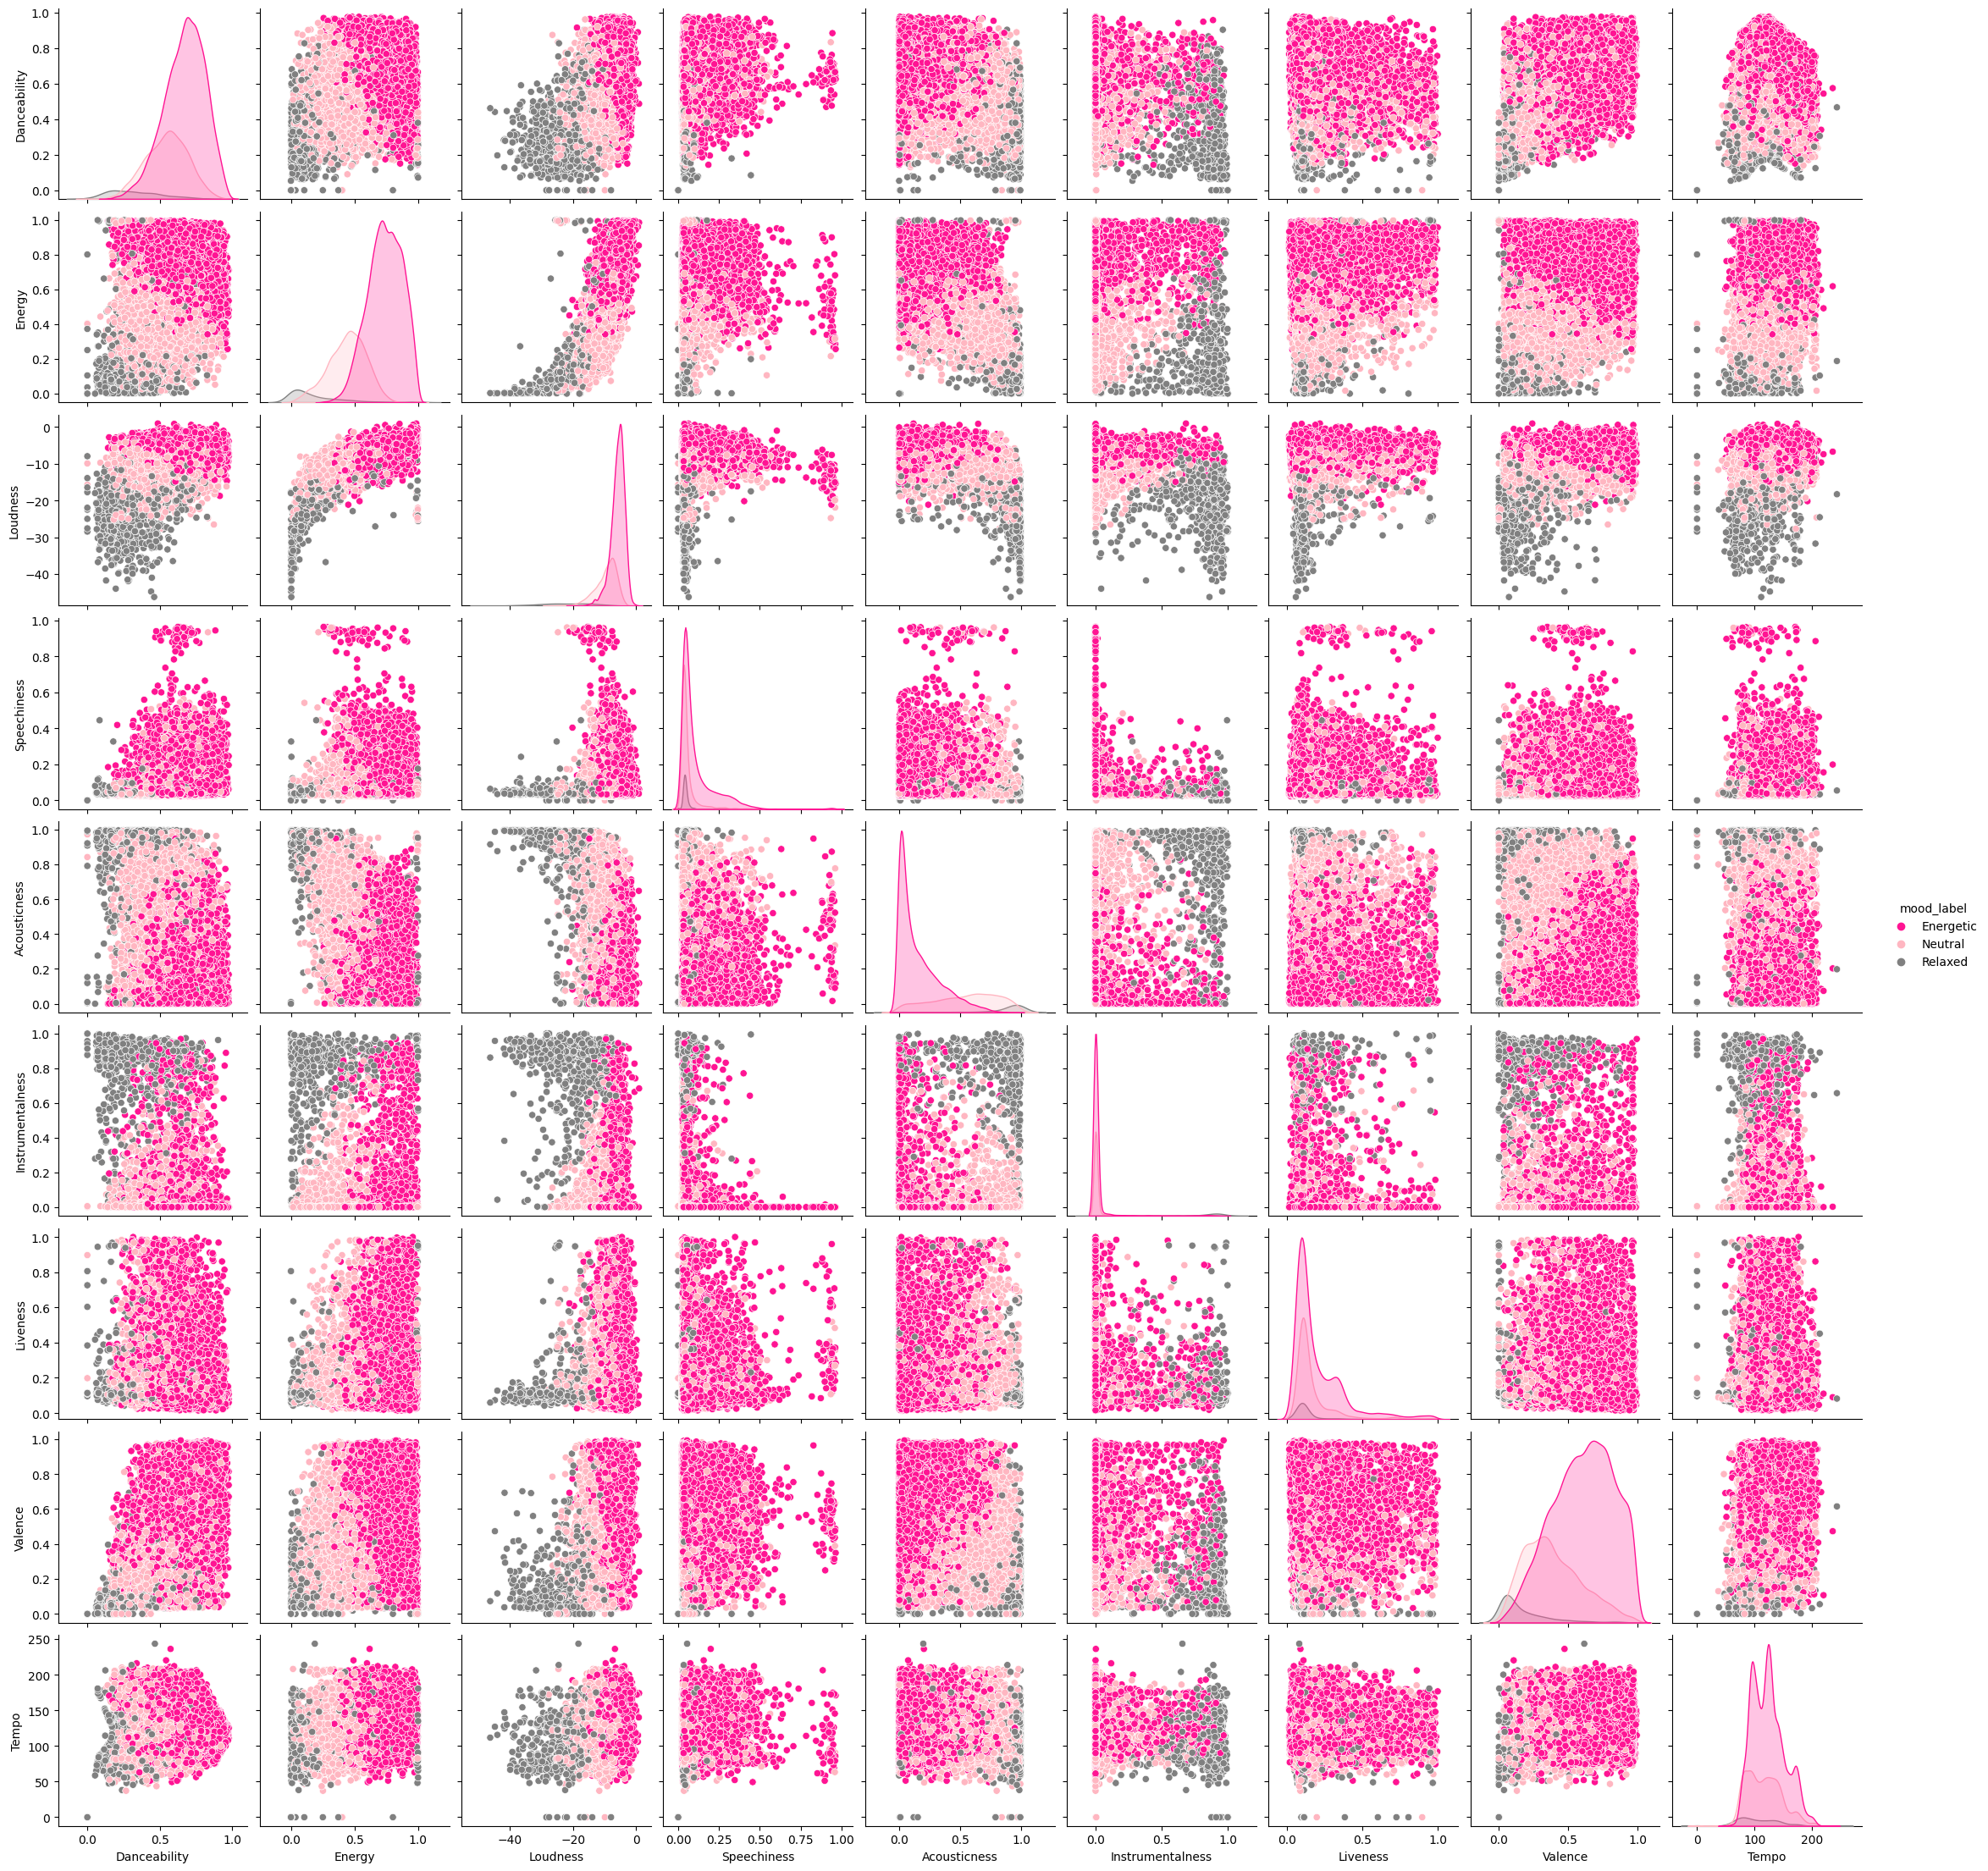

In [ ]:
# Create a color dictionary
colors = {'Relaxed': 'grey', 'Neutral': 'lightpink', 'Energetic': 'deeppink'}

# Select mood labels and mood-based features
mood_features = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness',
                 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']

# Subset the data for mood labels and mood-based features
mood_data = df_cleaned[['mood_label'] + mood_features]

# Create a scatter plot matrix with adjusted height
g = sns.pairplot(mood_data, hue='mood_label', palette=colors, height=2.5)  # Adjust the height as needed


g.savefig("scatter_plot_matrix.png", dpi=300)

plt.show()


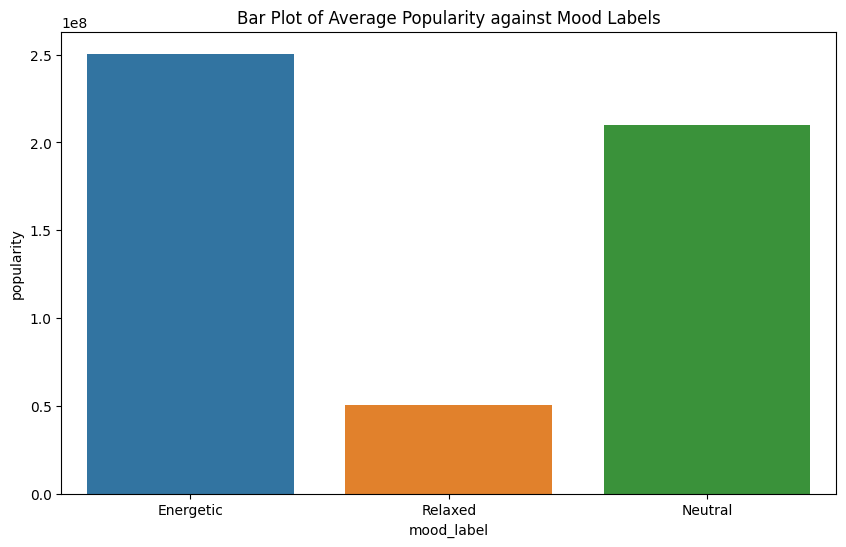

In [ ]:
# Bar plot of average popularity against mood labels
plt.figure(figsize=(10, 6))
sns.barplot(x='mood_label', y='popularity', data=df_balanced, ci=None)
plt.title('Bar Plot of Average Popularity against Mood Labels')
plt.show()


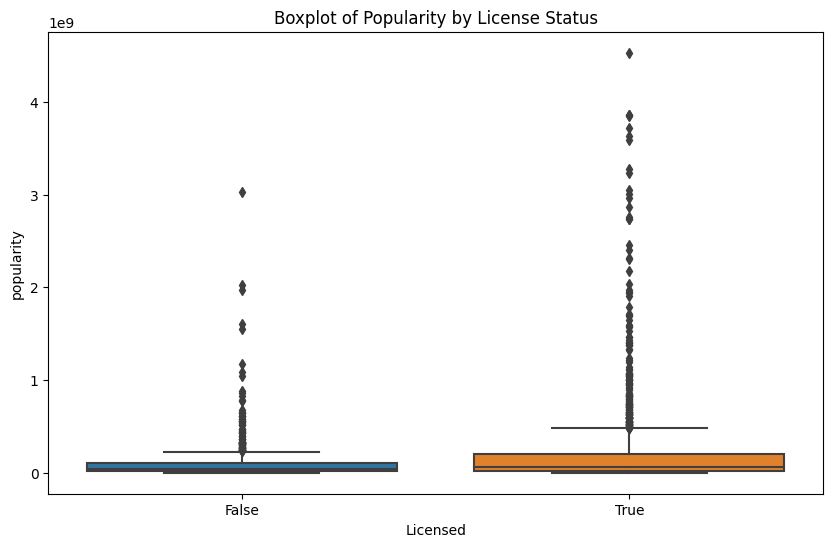

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Licensed', y='popularity', data=df_balanced)
plt.title('Boxplot of Popularity by License Status')
plt.show()


In [ ]:
df_balanced.mood_label.value_counts()

Energetic    812
Relaxed      812
Neutral      812
Name: mood_label, dtype: int64

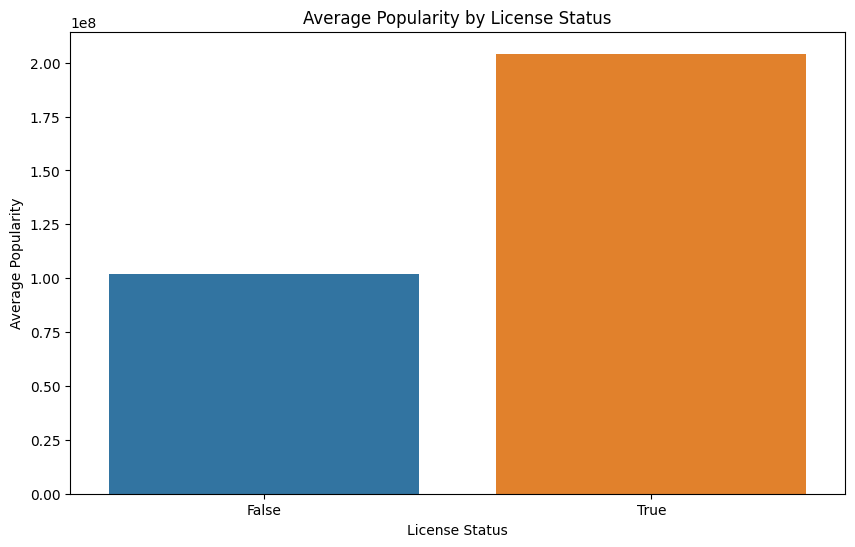

In [ ]:
# Group by 'Licensed' column and calculate mean popularity
licensed_popularity = df_balanced.groupby('Licensed')['popularity'].mean().reset_index()

# Create bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Licensed', y='popularity', data=licensed_popularity)
plt.title('Average Popularity by License Status')
plt.ylabel('Average Popularity')
plt.xlabel('License Status')
plt.show()


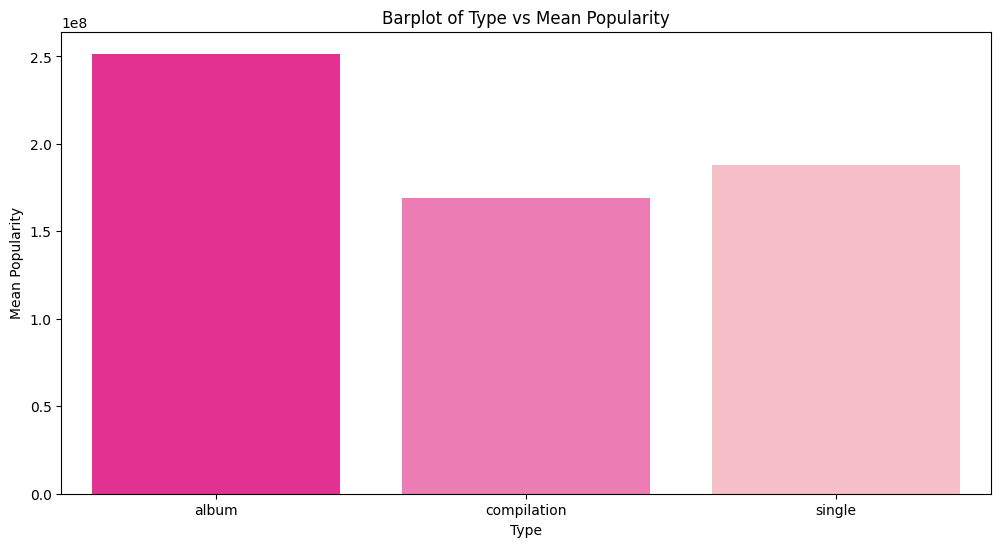

In [ ]:
# Define the color palette
color_palette = ['deeppink', 'hotpink', 'lightpink']

# Calculate the mean popularity for each type
mean_popularity = df_cleaned.groupby('Type')['popularity'].mean()

# Create the bar plot
plt.figure(figsize=(12,6))
sns.barplot(x=mean_popularity.index, y=mean_popularity.values, palette=color_palette)
plt.title('Barplot of Type vs Mean Popularity')
plt.xlabel('Type')
plt.ylabel('Mean Popularity')
plt.show()




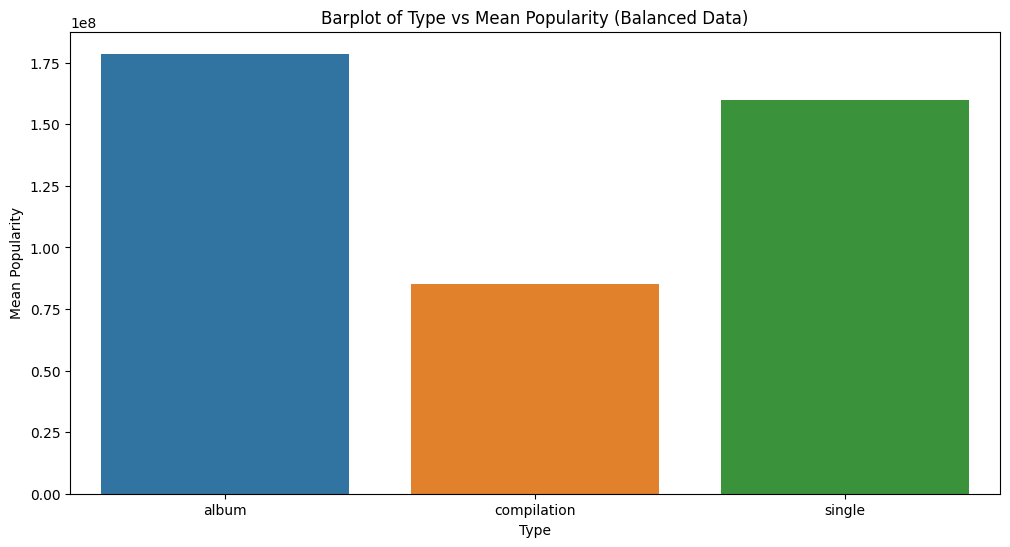

In [ ]:
# Calculate the mean popularity for each type in the balanced data
mean_popularity_balanced = df_balanced.groupby('Type')['popularity'].mean()

# Create the bar plot for the balanced data
plt.figure(figsize=(12,6))
sns.barplot(x=mean_popularity_balanced.index, y=mean_popularity_balanced.values)
plt.title('Barplot of Type vs Mean Popularity (Balanced Data)')
plt.xlabel('Type')
plt.ylabel('Mean Popularity')
plt.show()


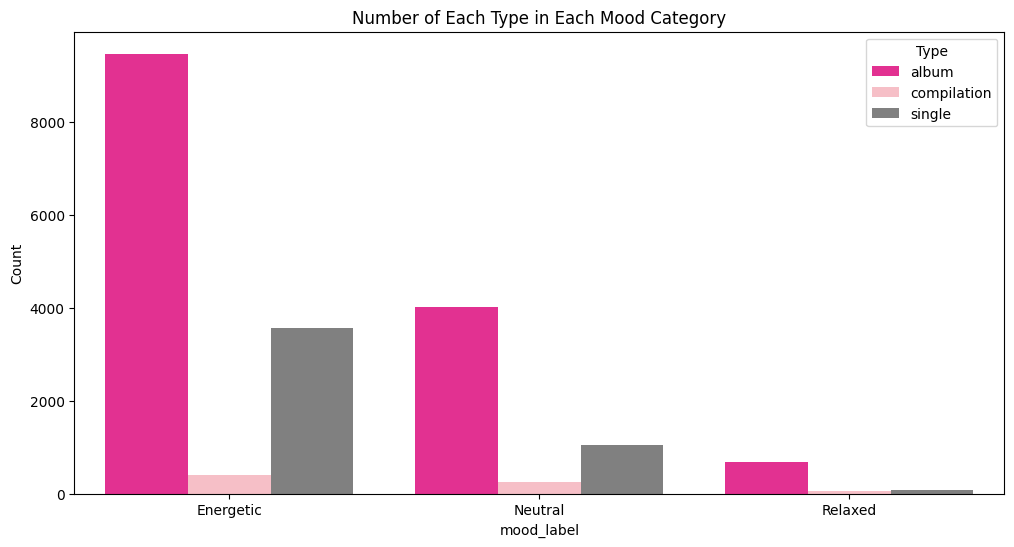

In [ ]:
# Group the data by 'mood_label' and 'Type' and count the number of songs in each group
mood_album_counts = df_cleaned.groupby(['mood_label', 'Type']).size().reset_index(name='Count')

# Create a color dictionary
color_dict = {'Relaxed': 'grey', 'Energetic': 'deeppink', 'Neutral': 'lightpink'}

# Create a color list based on the order of mood labels in the DataFrame
color_list = [color_dict[mood] for mood in mood_album_counts['mood_label'].unique()]

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='mood_label', y='Count', hue='Type', data=mood_album_counts, palette=color_list)
plt.title('Number of Each Type in Each Mood Category')
plt.show()



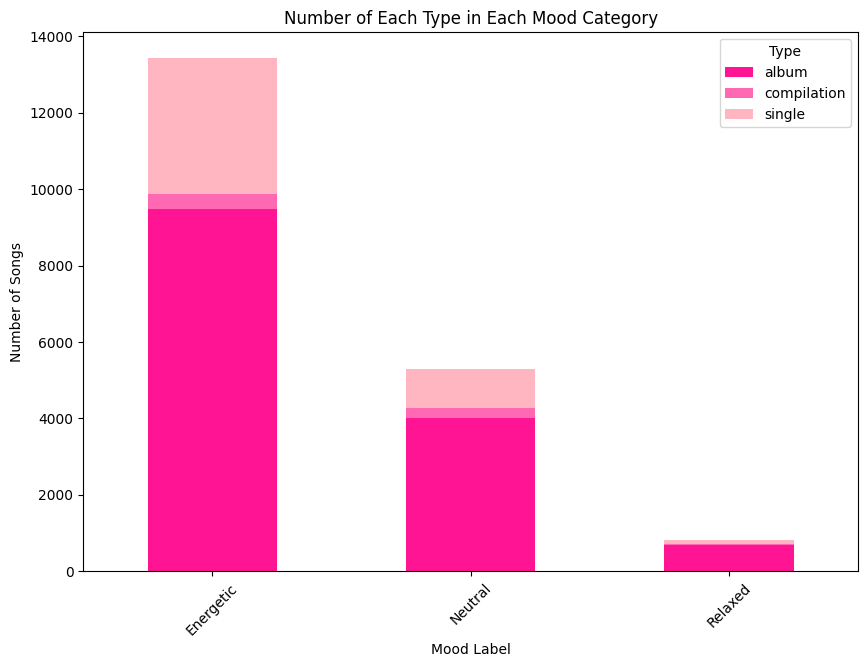

In [ ]:
# Create a pivot table
mood_album_pivot = pd.pivot_table(mood_album_counts, values='Count', index='mood_label', columns='Type', fill_value=0)

# Create a color dictionary for the album types
album_color_dict = {'album': 'deeppink', 'single': 'lightpink', 'compilation': 'hotpink'}

# Create a color list for the Types
album_colors = [album_color_dict[col] for col in mood_album_pivot.columns if col in album_color_dict]

# Create the stacked bar plot
mood_album_pivot.plot(kind='bar', stacked=True, color=album_colors, figsize=(10, 7))

# Add labels and title
plt.xlabel('Mood Label')
plt.ylabel('Number of Songs')
plt.title('Number of Each Type in Each Mood Category')

# Rotate x-labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()


<Axes: ylabel='Type'>

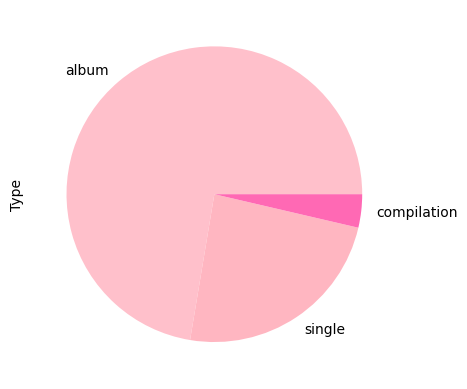

In [ ]:
# Define a pink color palette
colors = ['pink', 'lightpink', 'hotpink']  # Three different shades of pink

# Plot the pie chart with the specified colors
Types = df_cleaned['Type'].value_counts()
Types.plot(kind='pie', colors=colors)



<Axes: ylabel='Type'>

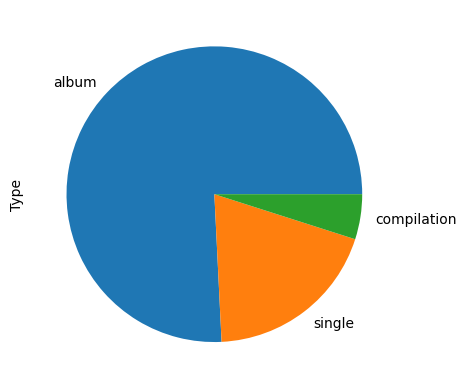

In [ ]:
Types = df_balanced['Type'].value_counts()
Types.plot(kind='pie')

In [ ]:
# Find the top 10 songs with the highest danceability
top_danceable_songs = df_cleaned.sort_values('Danceability', ascending=False).head(4)

# Display the top danceable songs along with the artists
print(top_danceable_songs[['Artist', 'Track', 'Danceability']])




            Artist             Track  Danceability
16555  BIA          CAN'T TOUCH THIS  0.975       
18822  Dave         Funky Friday      0.975       
750    Timbaland    Give It To Me     0.975       
8498   Xavier Wulf  Psycho Pass       0.973       


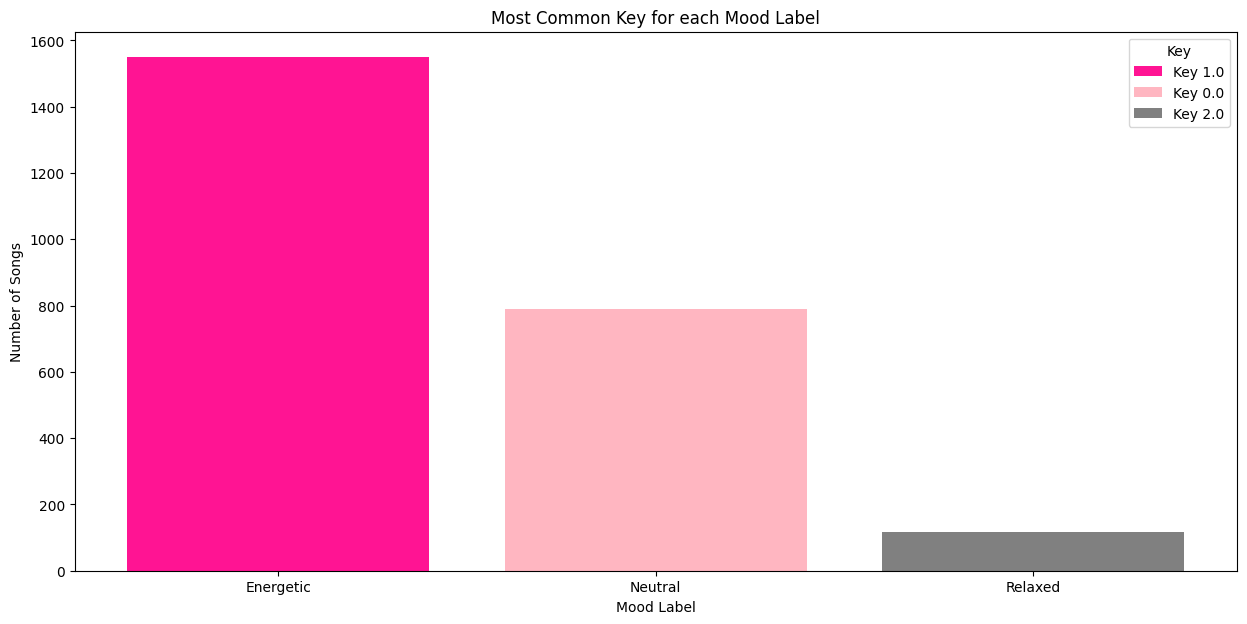

In [ ]:
# Color dictionary
color_dict = {'Relaxed': 'grey', 'Neutral': 'lightpink', 'Energetic': 'deeppink'}

# Group by 'mood_label' and 'Key', calculate the size, then reset index
mood_key_counts = df_cleaned.groupby(['mood_label', 'Key']).size().reset_index(name='Counts')

# Create an empty figure
plt.figure(figsize=(15, 7))

# For each mood, find the key with the maximum count and plot it
for mood in mood_key_counts['mood_label'].unique():
    data = mood_key_counts[mood_key_counts['mood_label'] == mood]
    max_key = data[data['Counts'] == data['Counts'].max()]['Key'].values[0]
    max_count = data['Counts'].max()
    plt.bar(mood, max_count, label=f'Key {max_key}', color=color_dict[mood])

# Add labels and title
plt.xlabel('Mood Label')
plt.ylabel('Number of Songs')
plt.title('Most Common Key for each Mood Label')
plt.legend(title='Key')

# Display the plot
plt.show()


